# EasyVisa Project - Submitted by Shaishav Merchant








<center><img src="https://merchantfly.com/wp-content/uploads/2024/03/ShaishavMerchant-Project-ET_EasyVisa.jpg" width="100%" height="100%"></center>

## Problem Statement

### Context:

Business communities in the United States are facing high demand for human resources, but one of the constant challenges is identifying and attracting the right talent, which is perhaps the most important element in remaining competitive. Companies in the United States look for hard-working, talented, and qualified individuals both locally as well as abroad.

The Immigration and Nationality Act (INA) of the US permits foreign workers to come to the United States to work on either a temporary or permanent basis. The act also protects US workers against adverse impacts on their wages or working conditions by ensuring US employers' compliance with statutory requirements when they hire foreign workers to fill workforce shortages. The immigration programs are administered by the Office of Foreign Labor Certification (OFLC).

OFLC processes job certification applications for employers seeking to bring foreign workers into the United States and grants certifications in those cases where employers can demonstrate that there are not sufficient US workers available to perform the work at wages that meet or exceed the wage paid for the occupation in the area of intended employment.

### Objective:

In FY 2016, the OFLC processed 775,979 employer applications for 1,699,957 positions for temporary and permanent labor certifications. This was a nine percent increase in the overall number of processed applications from the previous year. The process of reviewing every case is becoming a tedious task as the number of applicants is increasing every year.

The increasing number of applicants every year calls for a Machine Learning based solution that can help in shortlisting the candidates having higher chances of VISA approval. OFLC has hired your firm EasyVisa for data-driven solutions. You as a data scientist have to analyze the data provided and, with the help of a classification model:

* Facilitate the process of visa approvals.
* Recommend a suitable profile for the applicants for whom the visa should be certified or denied based on the drivers that significantly influence the case status.

### Data Description

The data contains the different attributes of the employee and the employer. The detailed data dictionary is given below.

* case_id: ID of each visa application
* continent: Information of continent the employee
* education_of_employee: Information of education of the employee
* has_job_experience: Does the employee has any job experience? Y= Yes; N = No
* requires_job_training: Does the employee require any job training? Y = Yes; N = No
* no_of_employees: Number of employees in the employer's company
* yr_of_estab: Year in which the employer's company was established
* region_of_employment: Information of foreign worker's intended region of employment in the US.
* prevailing_wage:  Average wage paid to similarly employed workers in a specific occupation in the area of intended employment. The purpose of the prevailing wage is to ensure that the foreign worker is not underpaid compared to other workers offering the same or similar service in the same area of employment.
* unit_of_wage: Unit of prevailing wage. Values include Hourly, Weekly, Monthly, and Yearly.
* full_time_position: Is the position of work full-time? Y = Full Time Position; N = Part Time Position
* case_status:  Flag indicating if the Visa was certified or denied

## Importing necessary libraries

In [2]:
# Libraries to suppress warnings
import warnings
warnings.filterwarnings('ignore')

# Libraries for computation and data manipulation
import numpy as np
import pandas as pd

# Libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Libraries for data preprocessing and model evaluation
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV

# Libraries for machine learning models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier

# Set pandas display options for better readability of output
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 200)
pd.set_option("display.float_format", lambda x: "%.5f" % x)

# Library to improve displaying dataframes with HTML titles
from IPython.display import display, HTML

# Set Seaborn aesthetic parameters
sns.set(
    context='notebook',
    style='darkgrid',
    #palette="Blues",
    font='sans-serif',
    font_scale=0.8,
    rc={'figure.figsize': (8, 5)}
)

## Index for Important Sections:
* <a href = #dataoverview>Data Overview</a>
* <a href = #edamain>Exploratory Data Analysis (EDA)</a>
* <a href = #datapp>Data Preprocessing</a>
* <a href = #mec>Model Evaluation Criterion</a>
* <a href = #dtmodel>Building Decision Tree models</a>
* <a href = #bagmodel>Building Bagging models</a>
* <a href = #boostmodel>Building Boosting models</a>
* <a href = #modelcomp>Model Comparison & Final Model Selection</a>
* <a href = #ainr>Actionable Insights and Recommendations</a>
* <a href = #appendix>Appendix</a>


## <a name='dataoverview'>Data Overview</a>
* Load Dataset
* View Data (top and bottom rows)
* Shape of the dataset
* Dataset information
* Dateset Statistics (Numerical and Categorical Features)

### Loading Dataset

In [3]:
# Connecting to Google Drive for accessing the dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Read the dataset and load into local dataframe
evdata_path = '/content/drive/MyDrive/Colab Notebooks/Ensemble Techniques/Project/EasyVisa.csv'
evdata = pd.read_csv(evdata_path)

### Display top 5 rows of the dataset

In [5]:
# Read top 5 rows from the dataset
evdata.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.20290,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.65000,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.86000,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.03000,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.39000,Year,Y,Certified


### Display last 5 rows of the dataset

In [6]:
# Read last 5 rows from the dataset
evdata.tail()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.57000,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.79000,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.85000,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.77000,Year,Y,Certified
25479,EZYV25480,Asia,Bachelor's,Y,N,3195,1960,Midwest,70876.91000,Year,Y,Certified


### Shape of the Data
* The dataset contains 25,480 observations (rows) and 12 features (columns)

In [7]:
# Display shape of the dataset
evdata.shape

(25480, 12)

### Dataset Information
* The dataset contains 9 categorical columns (datatype = object) and 3 numerical columns (2 columns with datatype = int64 and 1 column with datatype = float64).
* There are no missing values in the dataset.
* The total memory usage of the dataset is 2.3 MB.

In [8]:
# Display dataset information
evdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


### Dataset Statistics - Numerical Fields (int64 and float64)

In [9]:
# Describe Numerical columns in the Dataset
evdata.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_employees,25480.00000,5667.04321,22877.92885,-26.00000,1022.00000,2109.00000,3504.00000,602069.00000
yr_of_estab,25480.00000,1979.40993,42.36693,1800.00000,1976.00000,1997.00000,2005.00000,2016.00000
prevailing_wage,25480.00000,74455.81459,52815.94233,2.13670,34015.48000,70308.21000,107735.51250,319210.27000


**Observations:**
* **Number of Employees (no_of_employees):** The average number of employees is 5,667, with a range from -26 to 602,069. The negative minimum value suggests a need for data correction, and the wide range indicates potential outliers.

* **Year of Establishment (yr_of_estab):** The data ranges from 1800 to 2016, which appears reasonable. However, we may need to transform this column to better understand its impact on visa status.

* **Prevailing Wage (prevailing_wage):** The average wage is $74,456, with a wide range of values indicating potential outliers. The variation seems to be due to different **unit_of_wage**, may have affected the mean and median values. We may want to explore standardizing the **prevailing_wage** column.

### Dataset Statistics - Categorical Fields (object)

In [10]:
# Describe Categorical columns in the Dataset
evdata.describe(include='object').T

,count,unique,top,freq
case_id,25480,25480,EZYV01,1
continent,25480,6,Asia,16861
education_of_employee,25480,4,Bachelor's,10234
has_job_experience,25480,2,Y,14802
requires_job_training,25480,2,N,22525
region_of_employment,25480,5,Northeast,7195
unit_of_wage,25480,4,Year,22962
full_time_position,25480,2,Y,22773
case_status,25480,2,Certified,17018


**Observations:**
* **Case ID (case_id):** Unique ID for each visa application, is not relevent for inferance and can be excluded from the dataset.

* **Continent (continent):** There are 6 unique continent values, with Asia being the most common (66% of cases).

* **Education of Employee (education_of_employee):** There are 4 unique education levels, with Bachelor's being the most common (40% of cases). Since the education levels typically have a natural order, we can encode the column with ordinal numbers for modeling purposes.

* **Job Experience (has_job_experience):** About 58% of employees have job experience (Y), while 42% do not (N).

* **Job Training (requires_job_training):** About 88% of employees do not require job training (N), while 12% do (Y).

* **Region of Employment (region_of_employment):** There are 5 unique regions, with the Northeast being the most common region of employment (28% of cases).

* **Unit of Wage (unit_of_wage):** There are 4 unique units, with Yearly being the most common (90% of cases).

* **Full-Time Position (full_time_position):** About 89% of positions are full-time (Y), while 11% are part-time (N).

* **Case Status (case_status):** This is the target variable. About 67% of visa applications are certified, while 33% are denied.

## <a name='edamain'>Exploratory Data Analysis (EDA)</a>

* EDA is an important part of any project involving data.
* It is important to investigate and understand the data better before building a model with it.
* A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
* A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**EDA Index:**

* <a href = #edaqa>EDA - Leading Questons and their Answers:</a>
* <a href = #eda>Detailed EDA - Univariate and Bivariate Analysis</a>

### Functions to assist in EDA

In [11]:
#Plots a stacked chart for two variables in a DataFrame and displays a pivot table with totals.
def plot_stacked_chart(df, column1, column2, show_totals=True, percentage=False):
    """
    Parameters:
    - df: pandas DataFrame
    - column1: column name for the x-axis (str)
    - column2: column name for the legend (str)
    - show_totals: whether to show total values in the chart (bool, default True)
    - percentage: whether to display values as percentages (bool, default False)
    """
    # Create a pivot table
    pivot_table = df.groupby([column1, column2]).size().unstack(fill_value=0)

    # Add a total bookings column if show_totals is True
    if show_totals:
        pivot_table['Total'] = pivot_table.sum(axis=1)

    # Display the pivot table
    print(f"Pivot Table of {column2} by {column1}:")
    display(pivot_table)

    # Plot the stacked chart
    #plt.figure(figsize=(10, 6))
    if percentage:
        pivot_table_percentage = pivot_table.div(pivot_table.sum(axis=1), axis=0) * 100
        pivot_table_percentage.drop(columns=['Total'], inplace=True, errors='ignore')
        pivot_table_percentage.plot(kind='bar', stacked=True, ax=plt.gca())
        plt.ylabel('Percentage')
    else:
        pivot_table.drop(columns=['Total'], inplace=True, errors='ignore')
        pivot_table.plot(kind='bar', stacked=True, ax=plt.gca())
        plt.ylabel('Count')
    plt.xlabel(column1)
    plt.title(f'Number of {column2} by {column1}')
    plt.xticks(ticks=range(len(pivot_table.index)), labels=pivot_table.index, rotation=0)
    plt.legend(title=column2)
    #plt.grid(axis='y')
    plt.show()

# Creates a countplot for a given column in a DataFrame with data labels.
def plot_count(df, column, percentage=False):
    """
    Parameters:
    - df: pandas DataFrame
    - column: column name (str) for which the countplot will be created
    - percentage: if True, the plot will display percentages, otherwise counts (default: False)
    """
    # Calculate counts and percentages
    counts = df[column].value_counts()
    total = len(df)
    percentages = (counts / total * 100).round(2)

    # Create a table with counts and percentages
    table = pd.DataFrame({'Count': counts, 'Percentage': percentages})
    print("Table of Counts and Percentages:")
    display(table)

    # Plot
    plt.figure(figsize=(8, 6))
    if percentage:
        bars = sns.barplot(x=percentages.index, y=percentages.values)
        plt.ylabel('Percentage')
        label_values = percentages.values
    else:
        bars = sns.barplot(x=counts.index, y=counts.values)
        plt.ylabel('Count')
        label_values = counts.values
    plt.xlabel(column)
    plt.title(f'Countplot of {column}')

    # Add data labels
    for bar, label in zip(bars.patches, label_values):
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, height, f'{label:.2f}', ha='center', va='bottom')

    plt.show()

# Compares two features in a DataFrame, plots a boxplot with mean indicator, and displays a table with statistics.
def compare_features(df, column1, column2):
    """
    Parameters:
    - df: pandas DataFrame
    - column1: column name for the x-axis
    - column2: column name for the y-axis
    """

    # Create a table with min, max, and mean of column 2 grouped by column 1
    stats_table = df.groupby(column1)[column2].agg(['min', 'max', 'mean']).reset_index()
    print(f"Table of {column2} Statistics Grouped by {column1}:")
    display(stats_table)

    # Plot boxplot with mean indicator
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[column1], y=df[column2], showmeans=True,
                meanprops={"marker":"o", "markerfacecolor":"red", "markeredgecolor":"black"})
    plt.xlabel(column1)
    plt.ylabel(column2)
    plt.title(f'Boxplot of {column2} by {column1}')
    plt.grid(True)
    plt.show()


### Data Checks and Corrections before EDA
* Drop case_id column
* Treat negative values in no_of_employees column
* Check for duplicates



In [12]:
# Create a copy of dataset before correction.
evdata_eda = evdata.copy()

#### Drop **case_id** column

In [13]:
# Remove case_id column as it will not add any value to the model
evdata_eda.drop(columns='case_id',axis=1,inplace=True)
evdata_eda.shape

(25480, 11)

#### Treat negative values in **no_of_employees** column

In [14]:
# Display negative values in no_of_employees
evdata_eda[evdata_eda['no_of_employees'] <= 0].shape

(33, 11)

In [15]:
# Since there are very few columns with with negative no_of_employee, we can drop these rows.
evdata_eda = evdata_eda[evdata_eda['no_of_employees'] > 0]
evdata_eda.shape

(25447, 11)

* Rows with negative values in **no_of_employees** has been removed.

#### Check for Duplicates

In [16]:
# Find duplicate values
evdata_eda.duplicated().sum()

0

* No duplicate values found.

### <a name='edaqa'>EDA Questons and Answers:</a>

**Leading Questions:**

1. Those with higher education may want to travel abroad for a well-paid job. Does education play a role in Visa certification?

2. How does the visa status vary across different continents?

3. Experienced professionals might look abroad for opportunities to improve their lifestyles and career development. Does work experience influence visa status?

4. In the United States, employees are paid at different intervals. Which pay unit is most likely to be certified for a visa?

5. The US government has established a prevailing wage to protect local talent and foreign workers. How does the visa status change with the prevailing wage?

#### 1. Those with higher education may want to travel abroad for a well-paid job. Does education play a role in Visa certification?
**Answer:**
* The data indicates that the likelihood of visa approval is higher for employees with advanced degrees.
* Specifically, the rejection rates for visa applications vary significantly by education level: only 13% for Doctorate holders, 21% for Master's, 38% for Bachelor's, and 66% for High School.
* The majority of applicants hold a Bachelor's degree (40%, or 10,220 applicants), followed by those with a Master's degree (38%, or 9,622 applicants).

Pivot Table of case_status by education_of_employee:


case_status,Certified,Denied,Total
education_of_employee,,,
Bachelor's,6362,3858,10220
Doctorate,1910,279,2189
High School,1164,2252,3416
Master's,7565,2057,9622


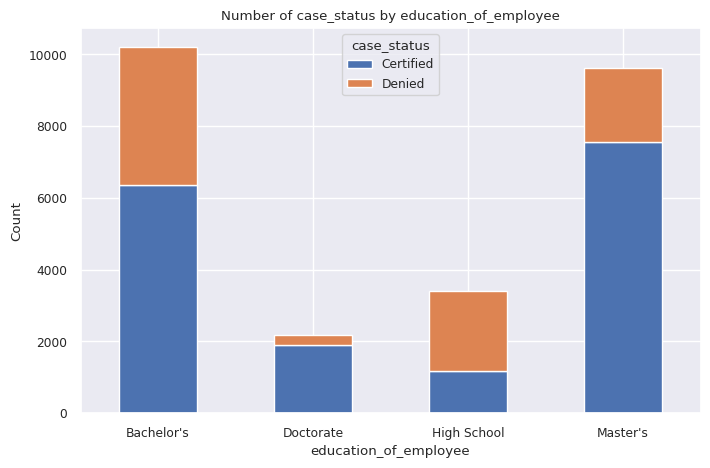

In [17]:
# Plot visuals to understand role of Education to influence Visa outcome
plot_stacked_chart(evdata_eda,'education_of_employee','case_status')

### 2. How does the visa status vary across different continents?
**Answer:**
* Employees from Europe have the highest visa approval rate at 79% (2,953 out of 3,727), while those from South America have the lowest at 58% (492 out of 851).
* Approval rates for other continents range from 62% to 72%, with Asia having a lower approval rate of 65% despite accounting for 66% of all applicants.
* The data suggests that the continent of origin plays a significant role in visa approval chances.

Pivot Table of case_status by continent:


case_status,Certified,Denied,Total
continent,,,
Africa,396,154,550
Asia,11001,5839,16840
Europe,2953,774,3727
North America,2037,1250,3287
Oceania,122,70,192
South America,492,359,851


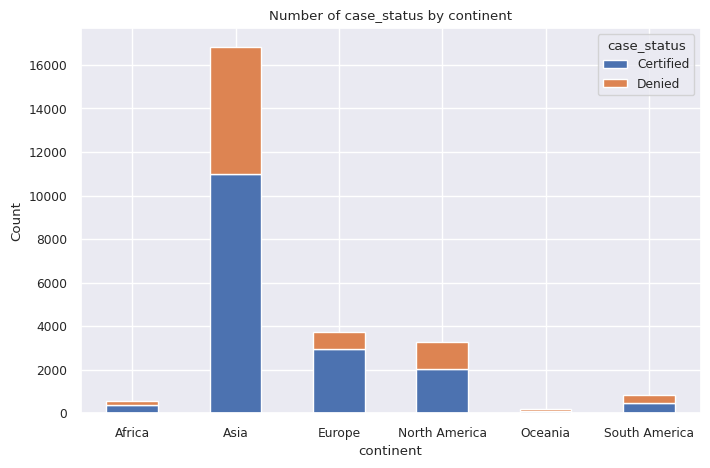

In [18]:
# Plot visuals to understand influence of continent to Visa outcome
plot_stacked_chart(evdata_eda,'continent','case_status')

### 3. Experienced professionals might look abroad for opportunities to improve their lifestyles and career development. Does work experience influence visa status?
**Answer:**
* Work experience has a significant impact on visa approval rates.
* Experienced professionals have a higher approval rate of 74% (11,015 out of 14,786), while inexperienced professionals have a lower approval rate of 56% (5,986 out of 10,661).
* This could be an important factor in predicting outcome of visa application.


Pivot Table of case_status by has_job_experience:


case_status,Certified,Denied,Total
has_job_experience,,,
N,5986,4675,10661
Y,11015,3771,14786


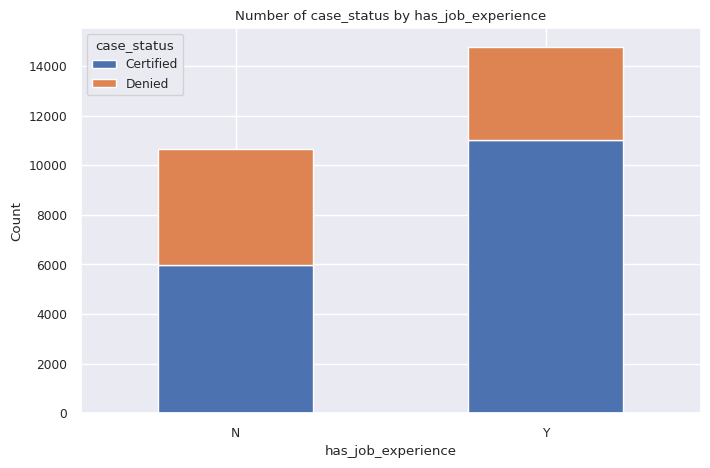

In [19]:
# Plot visuals to understand influence of expirience on Visa outcome
plot_stacked_chart(evdata_eda,'has_job_experience','case_status')

### 4. In the United States, employees are paid at different intervals. Which pay unit is most likely to be certified for a visa?
**Answer:**
* The data shows a clear preference for the annual pay unit (Yearly), with a 70% approval rate for employees paid yearly (16,030 out of 22,933 applications certified).
* The lowest approval rates are observed for the hourly pay unit, with only 35% approval (747 out of 2,153).
* Notably, nearly 90% of applicants have their wage unit listed as **Year**.
* Unit_of_wage might be another important influencer for predicting visa outcome.

Pivot Table of case_status by unit_of_wage:


case_status,Certified,Denied,Total
unit_of_wage,,,
Hour,747,1406,2153
Month,55,34,89
Week,169,103,272
Year,16030,6903,22933


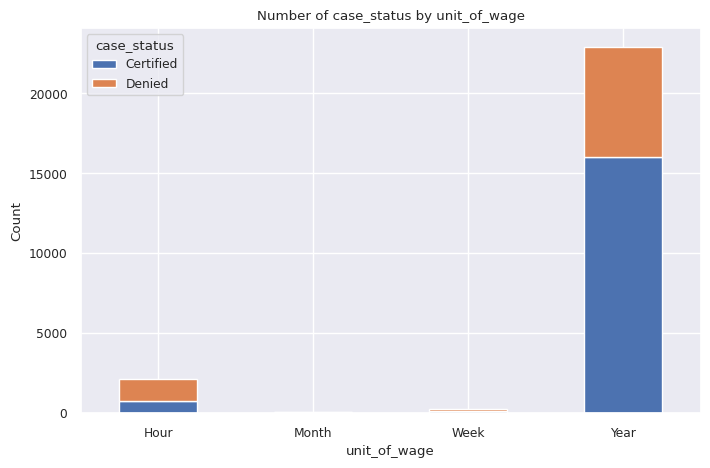

In [20]:
# Plot visuals to understand influence of Pay Unit on Visa outcome
plot_stacked_chart(evdata_eda,'unit_of_wage','case_status')

### 5. The US government has established a prevailing wage to protect local talent and foreign workers. How does the visa status change with the prevailing wage?
**Answer:**
* We adjusted the prevailing_wage to an annual basis to standardize comparisons across different wage units.
* The analysis indicates a minimal direct effect of the prevailing_wage on the likelihood of visa approval.
* Data reveals a trend where lower prevailing wages correlate with slightly higher visa approval rates, though the variance is not significant.

#### Standardize prevailing_wage column to help answer the above question.

In [21]:
# Understand distribution of prevailing_wage for each unit_of_wage
evdata_eda.groupby('unit_of_wage')['prevailing_wage'].describe()

,count,mean,std,min,25%,50%,75%,max
unit_of_wage,,,,,,,,
Hour,2153.00000,414.77388,275.05221,2.13670,152.70030,373.20450,637.31110,999.91950
Month,89.00000,87592.86404,59525.12492,1599.28000,44986.24000,81826.01000,121629.60000,264362.95000
Week,272.00000,85606.82051,44802.70481,2183.23000,51408.27750,85075.82000,111331.91000,280175.95000
Year,22933.00000,81237.54112,49959.08995,100.00000,43741.96000,76172.83000,111341.97000,319210.27000


**Observations before standardizing the prevailing_wage:**
* It appears that except where **unit_of_wage** is **Hour**, all other units show annualized salary.
* Mean of 414.77 suggest the for **unit_of_wage = Hour**, prevailing_wage represent one day's worth of remuneration.
* We will transform the prevailining wage column to annualized value.
* We assume typical working environment i.e. 5 days per week and 52 weeks in a year.

In [22]:
# Create a copy of dataset
evdata_eda_treated = evdata_eda.copy()

# Normalize prevailing_wages for unit_of_wage = Hour
evdata_eda_treated.loc[evdata_eda['unit_of_wage'] == 'Hour', 'prevailing_wage'] = evdata_eda_treated['prevailing_wage'] * 260  # 5 days/week * 52 weeks/year

# Understand distribution of prevailing_wage for each unit_of_wage
evdata_eda_treated.groupby('unit_of_wage')['prevailing_wage'].describe()

,count,mean,std,min,25%,50%,75%,max
unit_of_wage,,,,,,,,
Hour,2153.00000,107841.20939,71513.57569,555.54200,39702.07800,97033.17000,165700.88600,259979.07000
Month,89.00000,87592.86404,59525.12492,1599.28000,44986.24000,81826.01000,121629.60000,264362.95000
Week,272.00000,85606.82051,44802.70481,2183.23000,51408.27750,85075.82000,111331.91000,280175.95000
Year,22933.00000,81237.54112,49959.08995,100.00000,43741.96000,76172.83000,111341.97000,319210.27000


* Now that we have standardized the prevailing_wage, we will compare them with case_status.

#### Visualize relation between prevailing_wage and case_status

Table of prevailing_wage Statistics Grouped by case_status:


,case_status,min,max,mean
0,Certified,100.00000,318446.05000,82119.41185
1,Denied,153.11000,319210.27000,86451.73497


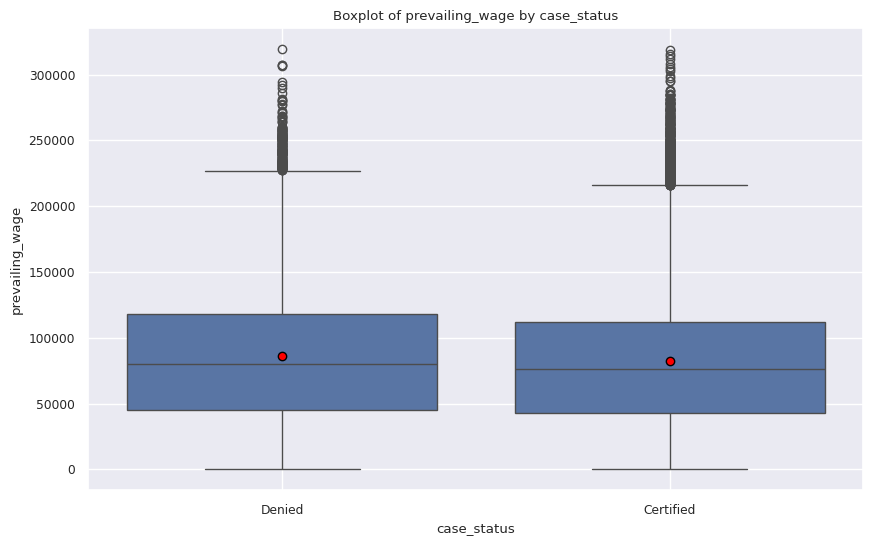

In [23]:
# Compare normalized prevailing_wages with case_status to find its influence.
compare_features(evdata_eda_treated,'case_status','prevailing_wage')

## <a name='datapp'>Data Preprocessing</a>

- Missing value treatment (if needed)
- Outlier detection and treatment (if needed)
- Feature engineering
- Preparing data for modeling

In [24]:
# Copy Dataset for Data Preprocessing tasks
evdata_dpp = evdata_eda_treated.copy()

### Missing value treatment

In [25]:
# List Missing values in the columns
evdata_dpp.isna().sum()

continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64

**Observations:**
* There are no missing value in the dataset

### Outlier detection and treatment

#### Function for Outlier Detection and Treatment

In [26]:
# Displays boxplots for each numeric column in a DataFrame to assist in outlier checks, with 4 boxplots per row.
def plot_outlier_check(df):
    """
    Parameters:
    - df: pandas DataFrame
    """
    numeric_cols = df.select_dtypes(include=['number']).columns
    num_plots = len(numeric_cols)
    num_rows = (num_plots + 3) // 4  # Calculate the number of rows needed

    plt.figure(figsize=(20, 5 * num_rows))

    for i, col in enumerate(numeric_cols, 1):
        plt.subplot(num_rows, 4, i)
        sns.boxplot(x=df[col])
        plt.title(col)

    plt.tight_layout()
    plt.show()

def treat_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    # Define the lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Replace outliers with the median value
    median_value = df[column].median()
    df[column] = df[column].apply(lambda x: median_value if x < lower_bound or x > upper_bound else x)

    return df

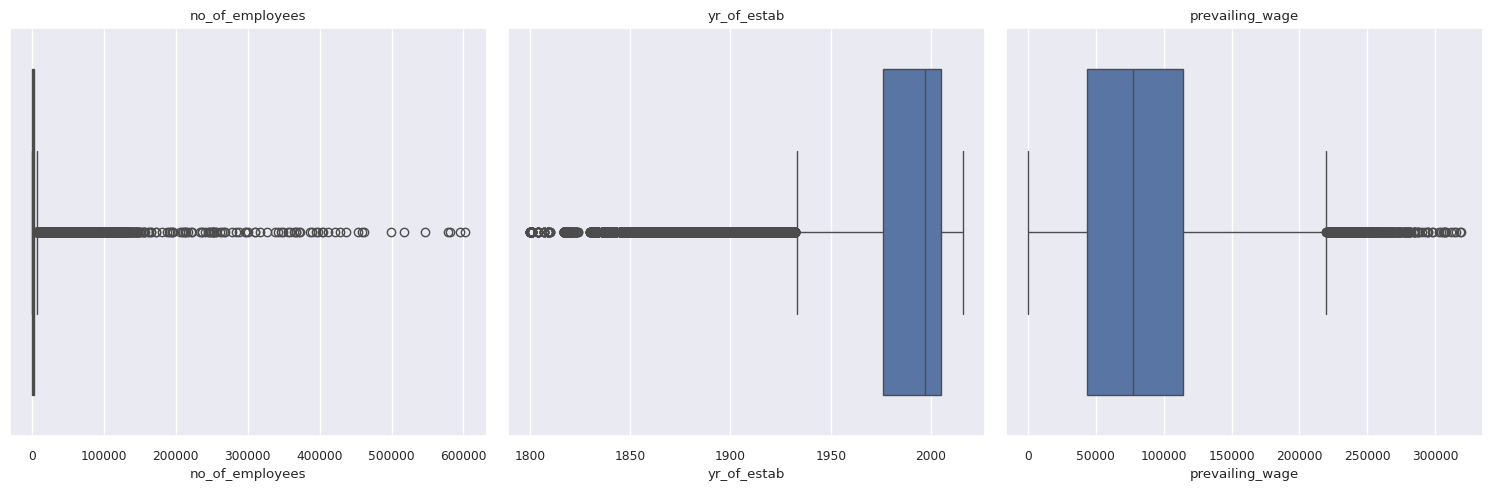

In [27]:
# Use boxplot to detect outliers
plot_outlier_check(evdata_dpp)

**Observtions:**
* no_of_employees show extreme outliers, we will treat them.
* yr_of_estab and prevailing_wage show proper data we will not treat them for outliers

#### Treat no_of_employees

In [28]:
# Treat outliers for no_of_employees
evdata_dpp = treat_outliers(evdata_dpp,'no_of_employees')
evdata_dpp['no_of_employees'].describe().T

count   25447.00000
mean     2185.48214
std      1433.18154
min        12.00000
25%      1025.00000
50%      2112.00000
75%      3106.00000
max      7195.00000
Name: no_of_employees, dtype: float64

### Feature Engineering
* Transform yr_of_estab to show age of the business
* Encode features case_status, job_experience, require_job_training and full_time_position
* Encode education_of_employee
* Create dummy variables for categorical columns

#### Transform yr_of_estab to show age of the employer's business

In [29]:
# Get the current year
max_year = evdata_dpp['yr_of_estab'].max()

# Create the company_age column
evdata_dpp['company_age'] = max_year - evdata_dpp['yr_of_estab']
evdata_dpp['company_age'].describe()

count   25447.00000
mean       36.60549
std        42.38593
min         0.00000
25%        11.00000
50%        19.00000
75%        40.00000
max       216.00000
Name: company_age, dtype: float64

#### Encode case_status, has_job_experience, requires_job_training and full_time_position features

In [31]:
# Encode case_status
evdata_dpp['case_status'] = evdata_dpp['case_status'].apply(lambda x: 1 if x == 'Certified' else 0)
evdata_dpp['case_status'].value_counts()

1    17001
0     8446
Name: case_status, dtype: int64

In [32]:
# Encode has_job_experience
evdata_dpp['has_job_experience'] = evdata_dpp['has_job_experience'].apply(lambda x: 1 if x == 'Y' else 0)
evdata_dpp['has_job_experience'].value_counts()

1    14786
0    10661
Name: has_job_experience, dtype: int64

In [33]:
# Encode requires_job_training
evdata_dpp['requires_job_training'] = evdata_dpp['requires_job_training'].apply(lambda x: 1 if x == 'Y' else 0)
evdata_dpp['requires_job_training'].value_counts()

0    22498
1     2949
Name: requires_job_training, dtype: int64

In [34]:
# Encode full_time_position
evdata_dpp['full_time_position'] = evdata_dpp['full_time_position'].apply(lambda x: 1 if x == 'Y' else 0)
evdata_dpp['full_time_position'].value_counts()

1    22741
0     2706
Name: full_time_position, dtype: int64

#### Encode education_of_employee column which has a natural order.

In [35]:
# Define the mapping for ordinal encoding
education_mapping = {'High School': 1,'Bachelor\'s': 2,'Master\'s': 3, 'Doctorate': 4}

# Apply the mapping to the education_of_employee column
evdata_dpp['education_of_employee'] = evdata_dpp['education_of_employee'].map(education_mapping)
evdata_dpp['education_of_employee'].value_counts()

2    10220
3     9622
1     3416
4     2189
Name: education_of_employee, dtype: int64

#### Create dummy variables for rest of the categorical columns

In [37]:
evdata_dpp = pd.get_dummies(evdata_dpp,drop_first=True)
evdata_dpp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25447 entries, 0 to 25479
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   education_of_employee           25447 non-null  int64  
 1   has_job_experience              25447 non-null  int64  
 2   requires_job_training           25447 non-null  int64  
 3   no_of_employees                 25447 non-null  float64
 4   yr_of_estab                     25447 non-null  int64  
 5   prevailing_wage                 25447 non-null  float64
 6   full_time_position              25447 non-null  int64  
 7   case_status                     25447 non-null  int64  
 8   company_age                     25447 non-null  int64  
 9   continent_Asia                  25447 non-null  uint8  
 10  continent_Europe                25447 non-null  uint8  
 11  continent_North America         25447 non-null  uint8  
 12  continent_Oceania               

### EDA After Data Preprocessing

In [38]:
evdata_dpp.describe().T

,count,mean,std,min,25%,50%,75%,max
education_of_employee,25447.00000,2.41592,0.82673,1.00000,2.00000,2.00000,3.00000,4.00000
has_job_experience,25447.00000,0.58105,0.49340,0.00000,0.00000,1.00000,1.00000,1.00000
requires_job_training,25447.00000,0.11589,0.32010,0.00000,0.00000,0.00000,0.00000,1.00000
no_of_employees,25447.00000,2185.48214,1433.18154,12.00000,1025.00000,2112.00000,3106.00000,7195.00000
yr_of_estab,25447.00000,1979.39451,42.38593,1800.00000,1976.00000,1997.00000,2005.00000,2016.00000
prevailing_wage,25447.00000,83557.33385,52633.76310,100.00000,43607.26500,77296.59000,113999.86500,319210.27000
full_time_position,25447.00000,0.89366,0.30828,0.00000,1.00000,1.00000,1.00000,1.00000
case_status,25447.00000,0.66809,0.47091,0.00000,0.00000,1.00000,1.00000,1.00000
company_age,25447.00000,36.60549,42.38593,0.00000,11.00000,19.00000,40.00000,216.00000
continent_Asia,25447.00000,0.66177,0.47312,0.00000,0.00000,1.00000,1.00000,1.00000


* Encoding and Outlier treatment has been completed. Please refer to detailed EDA to understand each feature and its relation to target variable (visa outcome).

### Preparing Data for Modelling
* Split Dataset
* Create Training and Test dataset

In [39]:
# Make a final dataset after Data Preprocessing
evdata_final = evdata_dpp.copy()

#### Split Dataset

In [40]:
# Create the Features and Target Dataset
X = evdata_final.drop(columns='case_status', axis=1)
y = evdata_final['case_status']

#### Create training and test datasets

In [41]:
# Create training and test datasets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=1,stratify=y)

# Print the train and test dataset and ensure the distribution of class in test data is identical as in train, test dataset.
print(f'Shape of Training set : {X_train.shape}')
print(f'\nShape of test set : {X_test.shape}')
print('\nPercentage of classes in training set:')
print(y_train.value_counts(normalize=True))
print('\nPercentage of classes in test set:')
print(y_test.value_counts(normalize=True))

Shape of Training set : (17812, 20)

Shape of test set : (7635, 20)

Percentage of classes in training set:
1   0.66809
0   0.33191
Name: case_status, dtype: float64

Percentage of classes in test set:
1   0.66811
0   0.33189
Name: case_status, dtype: float64


## <a name='mec'>Model Evaluation Criterion</a>

### Model Accuracy and Its Implications:

**Types of Incorrect Predictions:**

* Predicting approval for an applicant who is actually denied.
* Predicting denial for an applicant who is actually approved.

**Importance of Accurate Predictions:**

* Both types of errors are significant.
* Approving an unqualified applicant deprives a US citizen of a job opportunity.
* Denying a qualified applicant prevents US companies from filling essential roles, impacting economic productivity.

**Reducing Losses:**

* The model should prioritize identifying candidates likely to be approved due to the resource-intensive nature of the review process.
* The **F1 score** is a suitable evaluation metric, as it balances precision and recall, reducing both false negatives and false positives.

By following these guidelines, we aim to develop a model that accurately predicts visa approvals, efficiently allocates resources, and supports the objectives of the US visa approval process.

### Functions to evaluate model performance and plot confusion matrix

In [42]:
# Function to compute different metrics to check classification model performance
def model_performance_classification(model, predictors, target, threshold=0.5):
    """
    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # checking which probabilities are greater than threshold
    pred_temp = model.predict(predictors) > threshold

    # rounding off the above values to get classes
    pred = np.round(pred_temp)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

# Function to plot the confusion_matrix with percentages
def confusion_matrix_plot(model, predictors, target, threshold=0.5):
    """
    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """
    y_pred = model.predict(predictors) > threshold
    cm = confusion_matrix(target, y_pred)

    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

## <a name='dtmodel'>Building Decision Tree Models</a>
* Decision Tree Model
* Tuned Decition Tree Model

### Decision Tree

,Accuracy,Recall,Precision,F1
0,1.00000,1.00000,1.00000,1.00000


,Accuracy,Recall,Precision,F1
0,0.65593,0.73299,0.74720,0.74003


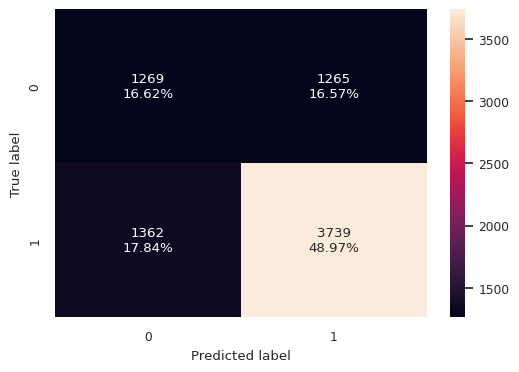

In [43]:
#Fitting the model
d_tree = DecisionTreeClassifier(random_state=1)
d_tree.fit(X_train,y_train)

# Calculating model performance in Training Data
d_tree_model_train_perf=model_performance_classification(d_tree,X_train,y_train)
display(HTML('<b>Training Performance:</b><br>' + d_tree_model_train_perf.to_html()))

# Calculating model performance in Test Data
d_tree_model_test_perf=model_performance_classification(d_tree,X_test,y_test)
display(HTML('<br><b>Testing Performance:</b><br>' + d_tree_model_test_perf.to_html()))

# Creating confusion matrix
display(HTML('<br><b>Confusion Matrix:</b>'))
confusion_matrix_plot(d_tree,X_test,y_test)

**Observations:**

* The Decision Tree Base Classifier exhibits overfitting, evidenced by 100% training accuracy versus 65.59% testing accuracy.
* Testing recall (73.30%) and precision (74.72%) imply the model is balanced.
* The confusion matrix indicates a balanced misclassification between false negatives and positives, but with a notable lean towards correctly predicting true positives (48.97%).
* To improve performance, model tuning is recommended, particularly to address overfitting and enhance prediction accuracy on unseen data.

### Decision Tree - Hyperparameter Tuning

In [44]:
#Choose the type of classifier.
dtree_estimator = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {'max_depth': np.arange(2,6),
              'min_samples_leaf': [1, 4, 7],
              'max_leaf_nodes' : [10, 15],
              'min_impurity_decrease': [0.0001,0.001]
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(dtree_estimator, parameters, scoring=scorer,n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
dtree_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
dtree_estimator.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, max_leaf_nodes=15,
                       min_impurity_decrease=0.0001, random_state=1)

,Accuracy,Recall,Precision,F1
0,0.73580,0.91269,0.74759,0.82193


,Accuracy,Recall,Precision,F1
0,0.73163,0.90688,0.74613,0.81869


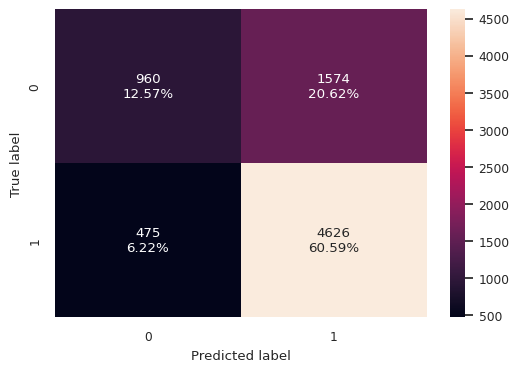

In [45]:
# Calculating model performance on Training Data
d_tree_tuned_model_train_perf=model_performance_classification(dtree_estimator,X_train,y_train)
display(HTML('<b>Training Performance:</b><br>' + d_tree_tuned_model_train_perf.to_html()))

# Calculating model performance on Test Data
d_tree_tuned_model_test_perf=model_performance_classification(dtree_estimator,X_test,y_test)
display(HTML('<br><b>Testing Performance:</b><br>' + d_tree_tuned_model_test_perf.to_html()))

#Creating confusion matrix
display(HTML('<br><b>Confusion Matrix:</b>'))
confusion_matrix_plot(dtree_estimator,X_test,y_test)

**Observations:**
* Training and testing accuracy are closely aligned at approximately 73%, with recall rates above 90%, indicating the model's consistency.
* The F1 score reflects substantial improvement post-tuning, with an 82% rate on the test set, pointing to enhanced balance and predictive quality.
* The confusion matrix for the test set indicates a significant proportion of false positives at 20.62%, revealing room for precision enhancement.
* The priority for further development is to balance the precision-recall trade-off, with potential exploration into ensemble methods like bagging and boosting for improved performance.

## <a name='bagmodel'> Building Bagging Models</a>
* Bagging Classifier
* Tuned Bagging Classifier
* Random Forest Classifier
* Tuned Random Forest Classifier

### Bagging Classifier

,Accuracy,Recall,Precision,F1
0,0.98490,0.98655,0.99080,0.98867


,Accuracy,Recall,Precision,F1
0,0.69731,0.77416,0.77310,0.77363


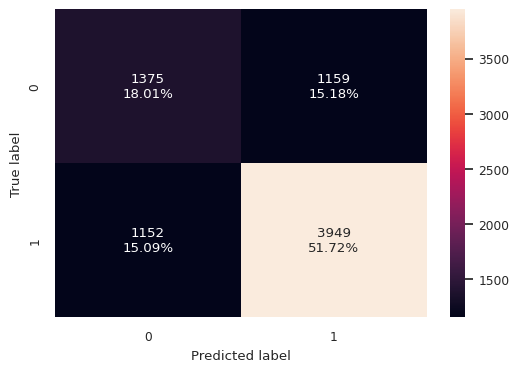

In [46]:
# Fitting the model
bagging_clf = BaggingClassifier(random_state=1)
bagging_clf.fit(X_train,y_train)

# Calculating model performance on Training Data
bagging_clf_model_train_perf=model_performance_classification(bagging_clf,X_train,y_train)
display(HTML('<b>Training Performance:</b><br>' + bagging_clf_model_train_perf.to_html()))

# Calculating model performance on Testing Data
bagging_clf_model_test_perf=model_performance_classification(bagging_clf,X_test,y_test)
display(HTML('<br><b>Testing Performance:</b><br>' + bagging_clf_model_test_perf.to_html()))

# Creating confusion matrix
display(HTML('<br><b>Confusion Matrix:</b>'))
confusion_matrix_plot(bagging_clf,X_test,y_test)

**Observations:**
* Exhibits exemplary training scores with near-perfect accuracy and F1 score, indicating potential overfitting.
* Testing performance reveals accuracy at 69.73% and F1 score at 77.36%, a significant drop from training results.
* The confusion matrix shows a higher rate of false negatives (15.09%) and false positives (15.18%), suggesting room for improvement in model.
* Actionable steps include hyperparameter tuning to achieve better generalization and reduce overfitting, as reflected in the test performance disparity.

### Bagging Classfier with Hyperparameter Tuning

In [47]:
# Choose the type of classifier.
bagging_estimator_tuned = BaggingClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {'max_samples': [0.8,0.9,1],
              'max_features': [0.7,0.8,0.9],
              'n_estimators' : [30,50,70],
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(bagging_estimator_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
bagging_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
bagging_estimator_tuned.fit(X_train, y_train)

BaggingClassifier(max_features=0.7, max_samples=0.9, n_estimators=70,
                  random_state=1)

,Accuracy,Recall,Precision,F1
0,0.99820,1.00000,0.99732,0.99866


,Accuracy,Recall,Precision,F1
0,0.72600,0.87787,0.75298,0.81064


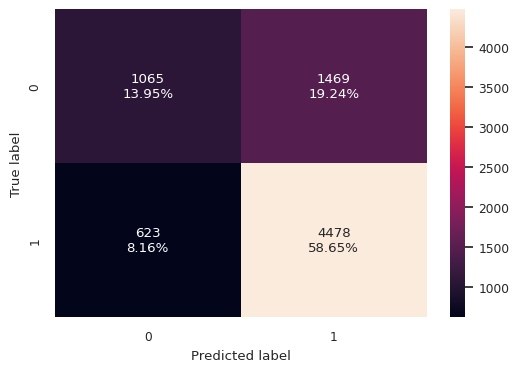

In [48]:
# Calculating model performance on Training Data
bagging_clf_tuned_model_train_perf=model_performance_classification(bagging_estimator_tuned,X_train,y_train)
display(HTML('<b>Training Performance:</b><br>' + bagging_clf_tuned_model_train_perf.to_html()))

# Calculating model performance on Test Data
bagging_clf_tuned_model_test_perf=model_performance_classification(bagging_estimator_tuned,X_test,y_test)
display(HTML('<br><b>Testing Performance:</b><br>' + bagging_clf_tuned_model_test_perf.to_html()))

#Creating confusion matrix
display(HTML('<br><b>Confusion Matrix:</b>'))
confusion_matrix_plot(bagging_estimator_tuned,X_test,y_test)

**Observations:**
* Training results showcase exceptional performance with an F1 score of 99.87%, suggesting overfitting, which remains a concern.
* Testing accuracy improved to 72.60%, with a notable F1 score of 81.06%, pointing to better generalization than the base model.
* The confusion matrix indicates a high true positive rate at 58.65%, but there is still a substantial rate of false negatives at 8.16%.
* To address overfitting, further exploration of models like Random Forest is recommended, aiming for a more balanced performance between training and testing datasets.

### Random Forest Classifier

,Accuracy,Recall,Precision,F1
0,1.00000,1.00000,1.00000,1.00000


,Accuracy,Recall,Precision,F1
0,0.71709,0.83023,0.76596,0.79680


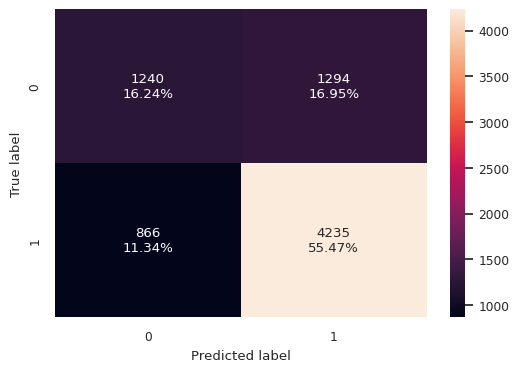

In [49]:
# Fitting the model
rf_estimator = RandomForestClassifier(random_state=1)
rf_estimator.fit(X_train,y_train)

# Calculating model performance on Training Data
rf_estimator_model_train_perf=model_performance_classification(rf_estimator,X_train,y_train)
display(HTML('<b>Training Performance:</b><br>' + rf_estimator_model_train_perf.to_html()))

# Calculating model performance on Test Data
rf_estimator_model_test_perf=model_performance_classification(rf_estimator,X_test,y_test)
display(HTML('<br><b>Testing Performance:</b><br>' + rf_estimator_model_test_perf.to_html()))

#Creating confusion matrix
display(HTML('<br><b>Confusion Matrix:</b>'))
confusion_matrix_plot(rf_estimator,X_test,y_test)

**Observations:**
* The Random Forest Classifier shows perfect training scores, a classic sign of overfitting, as real-world data rarely produces such results.
* Testing performance shows a decrease in accuracy to 71.71% with an F1 score of 79.68%, suggesting the model is not generalizing as well as desired.
* The test set performance also show a high recall rate of 83.49%, but with a lower precision of 76.56%, leading to a larger number of false positives (16.95%).
* Moving forward, hyperparameter tuning will be crucial to balance out the model's fit and improve its testing accuracy and precision.

### Random Forest Classfier with Hyperparameter Tuning

In [50]:
# Choose the type of classifier.
rf_tuned = RandomForestClassifier(random_state=1)

parameters = {
    "n_estimators": [50,110,25],
    "min_samples_leaf": np.arange(1, 4),
    "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'],
    "max_samples": np.arange(0.4, 0.7, 0.1)
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(rf_tuned, parameters, scoring=scorer, cv=5,n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
rf_tuned.fit(X_train, y_train)

RandomForestClassifier(max_samples=0.5, min_samples_leaf=3, n_estimators=110,
                       random_state=1)

,Accuracy,Recall,Precision,F1
0,0.81962,0.92706,0.82470,0.87289


,Accuracy,Recall,Precision,F1
0,0.74237,0.86865,0.77357,0.81836


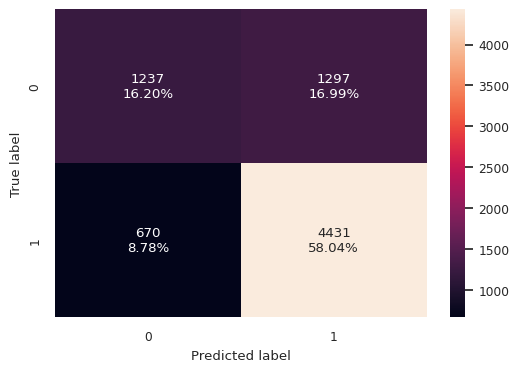

In [51]:
# Calculating model performance on Training Data
rf_tuned_model_train_perf=model_performance_classification(rf_tuned,X_train,y_train)
display(HTML('<br><b>Training Performance:</b><br>' + rf_tuned_model_train_perf.to_html()))

# Calculating model performance on Test Data
rf_tuned_model_test_perf=model_performance_classification(rf_tuned,X_test,y_test)
display(HTML('<br><b>Testing Performance:</b><br>' + rf_tuned_model_test_perf.to_html()))

# Creating confusion matrix
display(HTML('<br><b>Confusion Matrix:</b>'))
confusion_matrix_plot(rf_tuned,X_test,y_test)

**Observations:**
* Improved training accuracy (81.96%) and an F1 score (87.29%) indicate better performance post-tuning compared to the base model.
* Overfitting also seems to have reduced.
* The test performance exhibits an accuracy of 74.24% with an F1 score of 81.84%, showing the model has gained a better balance between recall and precision.
* The confusion matrix displays a reasonable distribution between false positives (16.99%) and false negatives (8.78%), which shows an improved prediction accuracy over the base model.
* To further enhance the model, exploration of boosting methods could potentially yield a model with higher predictive accuracy and less variance between training and testing performance.

## <a name='boostmodel'>Building Boosting Models</a>
* AdaBoost Classifier
* Tuned AdaBoost Classifier
* Gradient Boosting Classifier
* Tuned Gradient Boosting Classifier
* XGBoost Classifier
* Tuned XGBoost Classifier

### AdaBoost Classifier

,Accuracy,Recall,Precision,F1
0,0.73849,0.89143,0.75912,0.81997


,Accuracy,Recall,Precision,F1
0,0.73163,0.87865,0.75812,0.81395


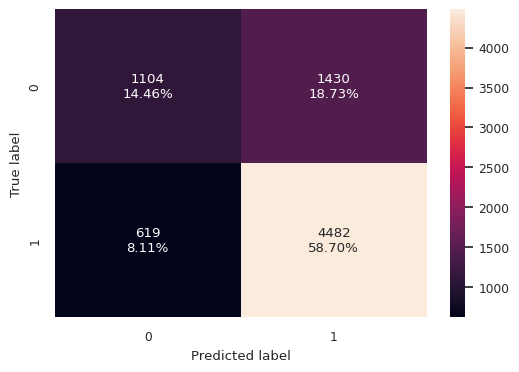

In [52]:
# Fitting the model
ab_clf = AdaBoostClassifier(random_state=1)
ab_clf.fit(X_train,y_train)

# Calculating model performance on Training Data
ab_clf_model_train_perf=model_performance_classification(ab_clf,X_train,y_train)
display(HTML('<b>Trainingg Performance:</b><br>' + ab_clf_model_train_perf.to_html()))

# Calculating model performance on Test Data
ab_clf_model_test_perf=model_performance_classification(ab_clf,X_test,y_test)
display(HTML('<br><b>Testing Performance:</b><br>' + ab_clf_model_test_perf.to_html()))

#Creating confusion matrix
display(HTML('<br><b>Confusion Matrix:</b>'))
confusion_matrix_plot(ab_clf,X_test,y_test)

**Observations:**
* The AdaBoost Classifier shows strong training and testing F1 scores of 82% and 81.4%, respectively, indicating consistent performance across both datasets.
* Testing metrics are closely aligned with training results, suggesting that the model generalizes well to new data.
* The confusion matrix reveals a balance between true positives and false negatives, with a true positive rate of 58.70% and a false negative rate of 8.11%, hinting at a well-calibrated model.
* Future steps include examining a tuned version of the AdaBoost Classifier to potentially improve precision and recall further.

### AdaBoost Classifer with Hyperparameter Tuning

In [53]:
# Choose the type of classifier.
ab_clf_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "base_estimator": [
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}

# Type of scoring used to compare parameter  combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(ab_clf_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
ab_clf_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
ab_clf_tuned.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3,
                                                         random_state=1),
                   learning_rate=0.1, random_state=1)

,Accuracy,Recall,Precision,F1
0,0.75208,0.87832,0.77884,0.82559


,Accuracy,Recall,Precision,F1
0,0.74578,0.86767,0.77758,0.82016


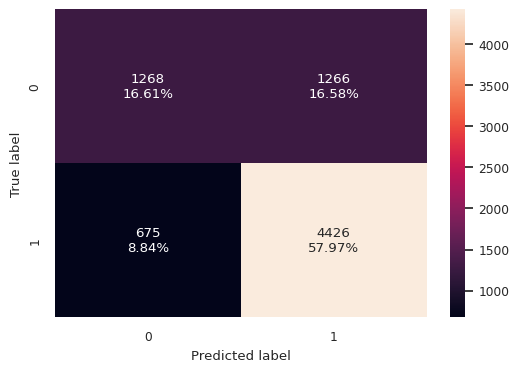

In [54]:
# Calculating model performance on Training Data
ab_clf_tuned_model_train_perf=model_performance_classification(ab_clf_tuned,X_train,y_train)
display(HTML('<b>Training Performance:</b><br>' + ab_clf_tuned_model_train_perf.to_html()))

# Calculating model performance on Test Data
ab_clf_tuned_model_test_perf=model_performance_classification(ab_clf_tuned,X_test,y_test)
display(HTML('<br><b>Testing Performance:</b><br>' + ab_clf_tuned_model_test_perf.to_html()))

# Creating confusion matrix
display(HTML('<br><b>Confusion Matrix:</b>'))
confusion_matrix_plot(ab_clf_tuned,X_test,y_test)

**Observations:**
* Demonstrates consistency with an F1 score of 82.56% in training and 82.02% in testing, indicating no overfitting.
* The test recall of 86.77% and precision of 77.76% suggest the model maintains a good balance between sensitivity and specificity.
* Confusion matrix analysis reveals a slight reduction in false positives, reinforcing the model's precision.
* Future strategies include exploring alternative boosting methods to further refine performance and potentially enhance the F1 score.

### Gradient Boosting Classfier

,Accuracy,Recall,Precision,F1
0,0.75601,0.87748,0.78335,0.82774


,Accuracy,Recall,Precision,F1
0,0.74643,0.86375,0.78024,0.81987


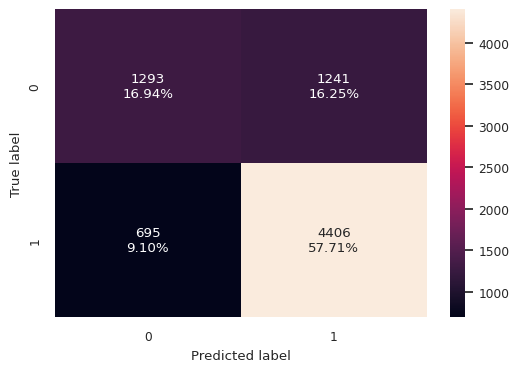

In [55]:
# Fitting the model
gb_clf = GradientBoostingClassifier(random_state=1)
gb_clf.fit(X_train,y_train)

# Calculating model performance on Training Data
gb_clf_model_train_perf=model_performance_classification(gb_clf,X_train,y_train)
display(HTML('<b>Training Performance:</b><br>' + gb_clf_model_train_perf.to_html()))

# Calculating model performance on Test Data
gb_clf_model_test_perf=model_performance_classification(gb_clf,X_test,y_test)
display(HTML('<br><b>Testing Performance:</b><br>' + gb_clf_model_test_perf.to_html()))

# Creating confusion matrix
display(HTML('<br><b>Confusion Matrix:</b>'))
confusion_matrix_plot(gb_clf,X_test,y_test)

**Observations:**
* The model achieves a good balance in testing with an F1 score of 81.99%, showing that it generalizes well.
* The confusion matrix indicates a robust true positive rate of 57.71%, with slightly higher false negatives to 9.10%.
* The consistency between training and testing metrics suggests effective learning without overfitting.
* Next steps include hyperparameter tuning to refine performance, particularly aiming to reduce false negatives while maintaining or improving other metrics.

### Gradient Boosting with Hyperparameter Tuning

In [56]:
# Choose the type of classifier.
gb_clf_tuned = GradientBoostingClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "subsample":[0.7,0.9],
    "max_features":[0.5,0.7,1],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(gb_clf_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gb_clf_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gb_clf_tuned.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=0.5, random_state=1, subsample=0.7)

,Accuracy,Recall,Precision,F1
0,0.75533,0.87891,0.78192,0.82758


,Accuracy,Recall,Precision,F1
0,0.74617,0.86571,0.77897,0.82006


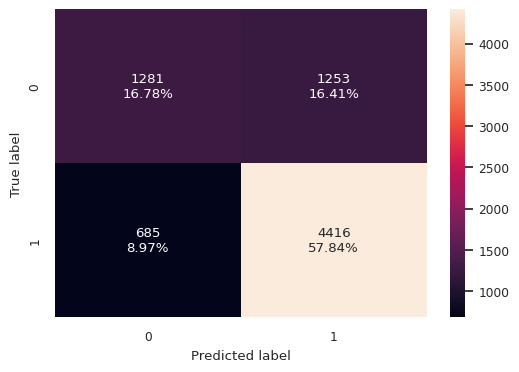

In [57]:
# Calculating model performance on Training Data
gb_clf_tuned_model_train_perf=model_performance_classification(gb_clf_tuned,X_train,y_train)
display(HTML('<b>Training Performance:</b><br>' + gb_clf_tuned_model_train_perf.to_html()))

# Calculating model performance on Test Data
gb_clf_tuned_model_test_perf=model_performance_classification(gb_clf_tuned,X_test,y_test)
display(HTML('<br><b>Testing Performance:</b><br>' + gb_clf_tuned_model_test_perf.to_html()))

# Creating confusion matrix
display(HTML('<br><b>Confusion Matrix:</b><br>'))
confusion_matrix_plot(gb_clf_tuned,X_test,y_test)

**Observations:**
* Post-tuning, the Gradient Boosting Classifier maintains an F1 score of 82% in testing, mirroring the base model's performance.
* The confusion matrix indicates a consistent true positive rate of 57.84% and manages to keep false negatives at 8.97%.
* The negligible difference between training and testing scores suggests that the hyperparameter adjustments have sustained model efficacy without overfitting.
* Exploration of the XGBoost model is next, to compare and potentially enhance overall model performance.

### XGBoost Classifier

,Accuracy,Recall,Precision,F1
0,0.83915,0.93034,0.84466,0.88543


,Accuracy,Recall,Precision,F1
0,0.72927,0.84866,0.76974,0.80727


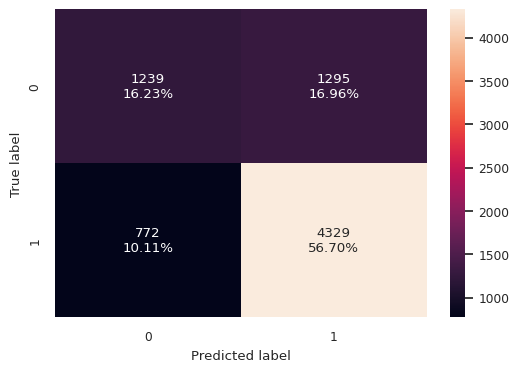

In [58]:
#Fitting the model
xgb_clf = XGBClassifier(random_state=1, eval_metric='logloss')
xgb_clf.fit(X_train,y_train)

# Calculating model performance on Training Data
xgb_clf_model_train_perf=model_performance_classification(xgb_clf,X_train,y_train)
display(HTML('<b>Training Performance:</b><br>' + xgb_clf_model_train_perf.to_html()))

# Calculating model performance on Testing Data
xgb_clf_model_test_perf=model_performance_classification(xgb_clf,X_test,y_test)
display(HTML('<br><b>Testing Performance:</b><br>' + xgb_clf_model_test_perf.to_html()))

# Creating confusion matrix
display(HTML('<br><b>Confusion Matrix:</b><br>'))
confusion_matrix_plot(xgb_clf,X_test,y_test)

**Observations:**
* Training performance indicates a strong model with an F1 score of 88.54%, but the testing score of 80.73% suggests some overfitting.
* The confusion matrix reveals a high true positive rate of 56.70% for testing; however, the false negative rate of 10.11% points to areas for improvement in model sensitivity.
* To reduce overfitting and enhance model precision, hyperparameter tuning will be crucial in the next phase of model optimization.

### XGBoost Classifier with Hyperparameter Tuning

In [59]:
# Choose the type of classifier.
xgb_clf_tuned = XGBClassifier(random_state=1, eval_metric='logloss')

# Grid of parameters to choose from
parameters = {
	          'n_estimators':np.arange(50,110,25),
            'scale_pos_weight':[1,2,5],
            'learning_rate':[0.01,0.1,0.05],
            'gamma':[1,3],
            'subsample':[0.7,0.9]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(xgb_clf_tuned, parameters,scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
xgb_clf_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
xgb_clf_tuned.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=1, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.01, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, random_state=1, ...)

,Accuracy,Recall,Precision,F1
0,0.75006,0.93588,0.75118,0.83342


,Accuracy,Recall,Precision,F1
0,0.73700,0.92256,0.74474,0.82417


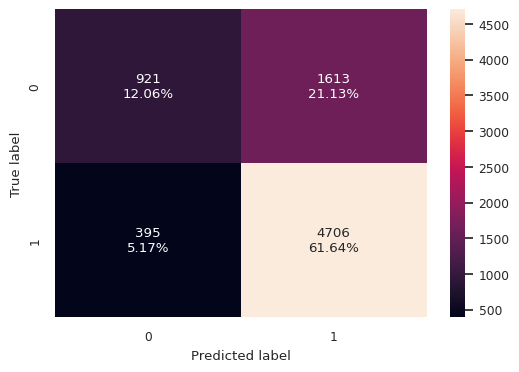

In [60]:
# Calculating model performance on Training Data
xgb_clf_tuned_model_train_perf=model_performance_classification(xgb_clf_tuned,X_train,y_train)
display(HTML('<b>Training Performance:</b><br>' + xgb_clf_tuned_model_train_perf.to_html()))

# Calculating model performance on Test Data
xgb_clf_tuned_model_test_perf=model_performance_classification(xgb_clf_tuned,X_test,y_test)
display(HTML('<br><b>Test Performance:</b><br>' + xgb_clf_tuned_model_test_perf.to_html()))

# Creating confusion matrix
display(HTML('<br><b>Confusion Matrix:</b><br>'))
confusion_matrix_plot(xgb_clf_tuned,X_test,y_test)

**Observations:**
* The hyperparameter-tuned XGBoost Classifier exhibits improved generalization, with an F1 score of 83.34% in training and 82.42% in testing.
* The confusion matrix presents a promising true positive rate of 61.64% in testing, but a false positive rate of 21.13% indicates room for refinement.
* This model iteration marks progress in reducing overfitting, with closer training and testing metrics.

## <a name='modelcomp'>Model Performance Comparison and Final Model Selection</a>
* Training Data Performance Metrics
* Test Data Performance Metrics
* Observations and Final Model Selection
* Feature Importance and its observations

### Training Data Performance Metric

In [61]:
# Training performance comparison

models_train_comp_df = pd.concat(
    [d_tree_model_train_perf.T,d_tree_tuned_model_train_perf.T,bagging_clf_model_train_perf.T,bagging_clf_tuned_model_train_perf.T,
     rf_estimator_model_train_perf.T,rf_tuned_model_train_perf.T,ab_clf_model_train_perf.T,
     ab_clf_tuned_model_train_perf.T,gb_clf_model_train_perf.T,gb_clf_tuned_model_train_perf.T,xgb_clf_model_train_perf.T,
    xgb_clf_tuned_model_train_perf.T],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree",
    "Decision Tree Tuned",
    "Bagging Classifier",
    "Bagging Classifier Tuned",
    "Random Forest",
    "Random Forest Tuned",
    "Adaboost Classifier",
    "Adabosst Classifier Tuned",
    "Gradient Boost Classifier",
    "Gradient Boost Classifier Tuned",
    "XGBoost Classifier",
    "XGBoost Classifier Tuned"]
display(HTML('<b>Training performance comparison:</b>'))
models_train_comp_df

,Decision Tree,Decision Tree Tuned,Bagging Classifier,Bagging Classifier Tuned,Random Forest,Random Forest Tuned,Adaboost Classifier,Adabosst Classifier Tuned,Gradient Boost Classifier,Gradient Boost Classifier Tuned,XGBoost Classifier,XGBoost Classifier Tuned
Accuracy,1.00000,0.73580,0.98490,0.99820,1.00000,0.81962,0.73849,0.75208,0.75601,0.75533,0.83915,0.75006
Recall,1.00000,0.91269,0.98655,1.00000,1.00000,0.92706,0.89143,0.87832,0.87748,0.87891,0.93034,0.93588
Precision,1.00000,0.74759,0.99080,0.99732,1.00000,0.82470,0.75912,0.77884,0.78335,0.78192,0.84466,0.75118
F1,1.00000,0.82193,0.98867,0.99866,1.00000,0.87289,0.81997,0.82559,0.82774,0.82758,0.88543,0.83342


### Test Data Performance Metric

In [62]:
# Test performance comparison

models_test_comp_df = pd.concat(
    [d_tree_model_test_perf.T,d_tree_tuned_model_test_perf.T,bagging_clf_model_test_perf.T,bagging_clf_tuned_model_test_perf.T,
     rf_estimator_model_test_perf.T,rf_tuned_model_test_perf.T,ab_clf_model_test_perf.T,
     ab_clf_tuned_model_test_perf.T,gb_clf_model_test_perf.T,gb_clf_tuned_model_test_perf.T,xgb_clf_model_test_perf.T,
    xgb_clf_tuned_model_test_perf.T],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree",
    "Decision Tree Tuned",
    "Bagging Classifier",
    "Bagging Classifier Tuned",
    "Random Forest",
    "Random Forest Tuned",
    "Adaboost Classifier",
    "Adabosst Classifier Tuned",
    "Gradient Boost Classifier",
    "Gradient Boost Classifier Tuned",
    "XGBoost Classifier",
    "XGBoost Classifier Tuned"]
display(HTML('<b>Test performance comparison:</b>'))
models_test_comp_df

,Decision Tree,Decision Tree Tuned,Bagging Classifier,Bagging Classifier Tuned,Random Forest,Random Forest Tuned,Adaboost Classifier,Adabosst Classifier Tuned,Gradient Boost Classifier,Gradient Boost Classifier Tuned,XGBoost Classifier,XGBoost Classifier Tuned
Accuracy,0.65593,0.73163,0.69731,0.72600,0.71709,0.74237,0.73163,0.74578,0.74643,0.74617,0.72927,0.73700
Recall,0.73299,0.90688,0.77416,0.87787,0.83023,0.86865,0.87865,0.86767,0.86375,0.86571,0.84866,0.92256
Precision,0.74720,0.74613,0.77310,0.75298,0.76596,0.77357,0.75812,0.77758,0.78024,0.77897,0.76974,0.74474
F1,0.74003,0.81869,0.77363,0.81064,0.79680,0.81836,0.81395,0.82016,0.81987,0.82006,0.80727,0.82417


### Observtions and Final Model Selection

**Observations:**

* The **Decision Tree** and **Random Forest** models show signs of overfitting, as indicated by a perfect F1 score of 1.0 on the training set but significantly lower scores on the test set.
* The **Bagging Classifier** and its **tuned version** also exhibit some overfitting, with a notable drop in F1 score from training to test.
* The **AdaBoost Classifier**, **Gradient Boost Classifier**, and **XGBoost Classifier** along with their tuned versions show less overfitting, with relatively consistent F1 scores between training and test sets.

**Recommendations:**

* **XGBoost Classifier Tuned** appears to be the best model, with the **highest F1 score** of **82%** on the test set and a relatively small difference between training and test F1 scores, indicating good generalization.
* **Gradient Boost Classifier Tuned** and **AdaBoost Classifier Tuned** are also strong contenders, with similar test F1 scores and minimal overfitting.

In summary, the **XGBoost Classifier Tuned** model is recommended for its strong performance on F1 score and generalization ability.

### Feature Importance of XGBoost Classifier Tuned

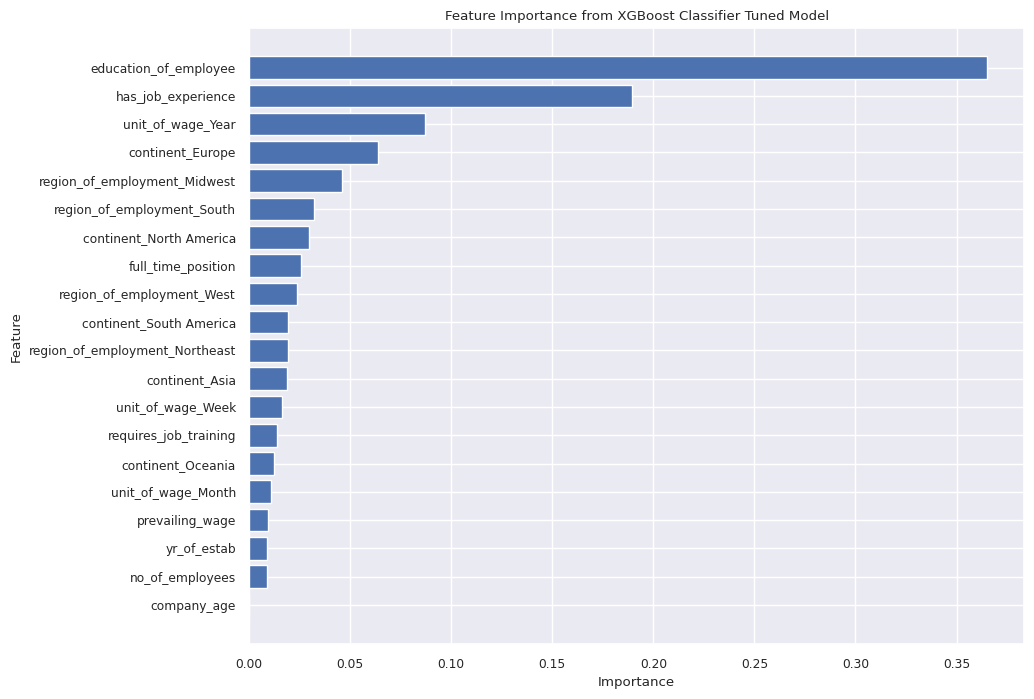

In [63]:
# Get importance of features from XGBoost Classifier Tuned model
feature_importances = xgb_clf_tuned.feature_importances_

# Get the feature names from the dataset
feature_names = X_train.columns  # Replace 'data' with your DataFrame containing the features

# Create a DataFrame to hold the feature importances
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort the DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 8))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance from XGBoost Classifier Tuned Model')
plt.gca().invert_yaxis()  # Invert y-axis to show the most important feature on top
plt.show()


**Observations:**
Based on the feature importance data in the context of visa approval, here are some observations:

* **Education of Employee:** This is the most important feature with an importance score of 0.3652, indicating that the education level of the employee plays a significant role in visa approval decisions. Higher education levels may be associated with a higher likelihood of visa approval.

* **Job Experience:** The second most important feature is whether the employee has job experience, with an importance score of 0.1894. Having job experience might increase the chances of visa approval, as it indicates the applicant's readiness for the job market.

* **Unit of Wage (Yearly):** The yearly unit of wage is also a significant feature with a score of 0.0873. This suggests that applicants with salaries reported on a yearly basis might have a higher chance of visa approval, possibly reflecting higher-income jobs.

* **Geographical Factors:** The continent of employment (Europe) and regions of employment (Midwest, South, and West) have notable importance scores, indicating that geographical location might influence visa approval decisions. This could be due to regional labor market demands or policies.

* **Full-Time Position:** Whether the position is full-time has some importance, which aligns with the expectation that full-time positions might be preferred for visa approvals.

* **Less Important Features:** Features like the **number of employees**, **year of establishment**, **prevailing wage** and **unit of wage (week and month)** have lower importance scores, indicating they have a lesser impact on visa approval decisions.

* **Company Age:** Surprisingly, **company age** has no importance in this model, suggesting that the age of the company does not influence visa approval in this context.

Overall, these observations suggest that an applicant's education level, job experience, and the nature of the job offer (including geographical location and wage details) are significant factors in visa approval decisions.

## <a name='ainr'>Actionable Insights and Recommendations</a>

### Actionable Insights

* **Education as a Strong Predictor:** Higher education levels notably correlate with increased visa approvals, suggesting the importance of educational qualifications in the visa decision process.
* **Experience Matters:** Applicants with job experience have a higher approval rate, emphasizing the value of experience in the job market.
* **Yearly Wages Favored:** Yearly wage earners are more likely to get visa approvals, possibly due to the perceived stability of annual salaries.
* **Geographic Trends:** Certain continents, especially Europe, show significantly higher visa approval rates, highlighting geographical influence. However, most applicants are from Asia.
* **Full-Time Bias:** Full-time positions tend to have better visa outcomes, aligning with the preference for more stable employment conditions.
* **Company Age and Size Less Impactful:** Contrary to expectations, the age and size of a company do not significantly affect visa approvals.
* **F1 Score Justification:** We choose the F1 score as our metric due to the balanced importance of precision and recall in our visa approval context, where both false negatives and false positives carry substantial weight.

### Recommendations

* **Enhance Educational Criteria:** Tailor the recruitment strategy to attract applicants with higher educational qualifications to improve approval odds.
* **Promote Experience:** Highlight job experience in the application process as a key factor for approval.
* **Wage Structure Review:** Standardize wage offers on an annual basis to align with patterns that show higher approval rates.
* **Regional Focus:** Direct recruitment efforts towards regions with high approval rates, like Europe, and tailor applications to meet the specific demands of the US labor market.
* **Model Selection:** Deploy the XGBoost Classifier Tuned model for predictions, given its superior F1 score and ability to generalize.
* **Model Enhancement:** Further improve prediction accuracy by tuning hyperparameters, incorporating more granular data, and using ensemble techniques to combine the strengths of different models.
* **Continual Learning:** Implement a continuous learning system for the model to adapt to changes in visa policy and labor market trends.
* **Application Review:** Conduct thorough reviews of denied applications to identify common factors that could be mitigated in future applications.
* **Policy Alignment:** Stay updated with immigration policies to better understand and anticipate the factors influencing visa outcomes.
* **Training Data Expansion:** Increase the diversity and size of the training dataset to cover a broader spectrum of cases, improving the model's ability to learn nuanced patterns.

These actionable insights and strategic recommendations are designed to guide the EasyVisa data science team in optimizing the visa approval prediction model and increasing the success rate of applications.

## <a name='appendix'>Appendix</a>

### <a name='eda'>Detailed Exploratory Data Analysis (EDA)</a>
* Univariate Analysis - Numerical Features
* Univariate Analysis - Categorical Features
* Bivariate Analysis - Relation with case_status (Target Variable)

#### Functions to plot charts for EDA

In [64]:
# Plots boxplots and histograms for numerical features of a DataFrame.
def plot_numerical(dataframe):
    # Extract numerical variables
    numeric_columns = dataframe.select_dtypes(include=['float64', 'int64']).columns
    num_vars = len(numeric_columns)

    # Calculate the number of rows for the subplot
    num_rows = (num_vars // 3) + (1 if num_vars % 3 != 0 else 0)

    # Set up the matplotlib figure
    fig, axes = plt.subplots(2 * num_rows, 3, figsize=(20, 5 * num_rows * 1.25), constrained_layout=True, gridspec_kw={'height_ratios': [1, 4] * num_rows})

    # Loop through the numerical variables to create boxplots and histograms
    for i, column in enumerate(numeric_columns):
        # Define the row and column index in the subplot grid
        row = (i // 3) * 2
        col = i % 3

        # Create a boxplot for the variable
        sns.boxplot(data=dataframe, x=column, ax=axes[row, col])
        axes[row, col].set_title(f'Box Plot and Histogram for {column}', fontsize=12)
        axes[row, col].tick_params(labelbottom=False)  # Remove x-ticks for the boxplot
        axes[row, col].set_xlabel('')  # Remove x-axis label for the boxplot

        # Create a histogram for the variable
        sns.histplot(data=dataframe, x=column, kde=True, ax=axes[row + 1, col], binwidth=None)
        axes[row + 1, col].set_title('')  # Remove title for the histogram
        axes[row + 1, col].set_xlabel(f'{column}\n\n')  # Set x-axis label for the histogram

        plt.show()

# Plots countplots for categorical features of a DataFrame.
def plot_categorical(df, figsize=(20, 5)):
    """
    Parameters:
    - df: pandas DataFrame
    - figsize: tuple, optional, default (15, 5)
        Size of each row of plots.
    """
    # Select categorical columns
    categorical_cols = df.select_dtypes(include=['object', 'category']).columns

    # Calculate the number of rows needed for the plots
    num_rows = (len(categorical_cols) + 2) // 3

    # Create subplots
    fig, axes = plt.subplots(num_rows, 3, figsize=(figsize[0], figsize[1] * num_rows))

    # Flatten the axes array for easier indexing
    axes = axes.flatten()

    # Plot countplots for each categorical column
    for i, col in enumerate(categorical_cols):
        sns.countplot(x=df[col], ax=axes[i])
        axes[i].set_title(f'Countplot of {col}')
        axes[i].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability

    # Hide any unused axes
    for ax in axes[len(categorical_cols):]:
        ax.axis('off')

    # Adjust the layout
    plt.tight_layout()
    plt.show()

from math import ceil
def plot_bivariate_analysis_tv(df, target_variable, figsize_per_chart=(5, 4)):
    """
    Plots bivariate analysis charts for numerical and categorical features against a categorical target variable.

    Parameters:
    - df: pandas DataFrame
    - target_variable: str, the name of the target variable column in the DataFrame
    - figsize_per_chart: tuple, optional, the size of each subplot
    """
    # Separate features into numerical and categorical based on dtype
    numeric_features = df.select_dtypes(include=['number']).columns.tolist()
    categorical_features = df.select_dtypes(exclude=['number', 'datetime']).columns.tolist()
    categorical_features.remove(target_variable)  # Exclude the target variable

    # Total number of features
    total_features = len(numeric_features) + len(categorical_features)

    # Calculate total rows needed for subplots (3 charts per row)
    total_rows = ceil(total_features / 3)

    # Create a figure for subplots
    fig, axes = plt.subplots(total_rows, 3, figsize=(figsize_per_chart[0]*3, figsize_per_chart[1]*total_rows))
    axes = axes.flatten()  # Flatten to 1D for easy indexing

    # Plot for numerical features
    for i, feature in enumerate(numeric_features):
        sns.boxplot(x=target_variable, y=feature, data=df, ax=axes[i], palette="coolwarm")
        axes[i].set_title(f'{feature} vs {target_variable}', fontsize=12)
        axes[i].set_xlabel(target_variable, fontsize=10)
        axes[i].set_ylabel(feature, fontsize=10)
        axes[i].tick_params(axis='x', rotation=45, labelsize=8)
        axes[i].tick_params(axis='y', labelsize=8)

    # Offset for categorical features in the subplot grid
    offset = len(numeric_features)

    # Plot for categorical features
    for i, feature in enumerate(categorical_features):
        sns.countplot(x=feature, hue=target_variable, data=df, ax=axes[i+offset], palette="coolwarm")
        axes[i+offset].set_title(f'{feature} vs {target_variable}', fontsize=12)
        axes[i+offset].set_xlabel(feature, fontsize=10)
        axes[i+offset].set_ylabel('Count', fontsize=10)
        axes[i+offset].tick_params(axis='x', rotation=45, labelsize=8)
        axes[i+offset].tick_params(axis='y', labelsize=8)

    # Hide any unused axes
    for ax in axes[total_features:]:
        ax.axis('off')

    # Adjust layout
    plt.tight_layout()
    plt.show()

#### Univariate Analysis - Numerical Features

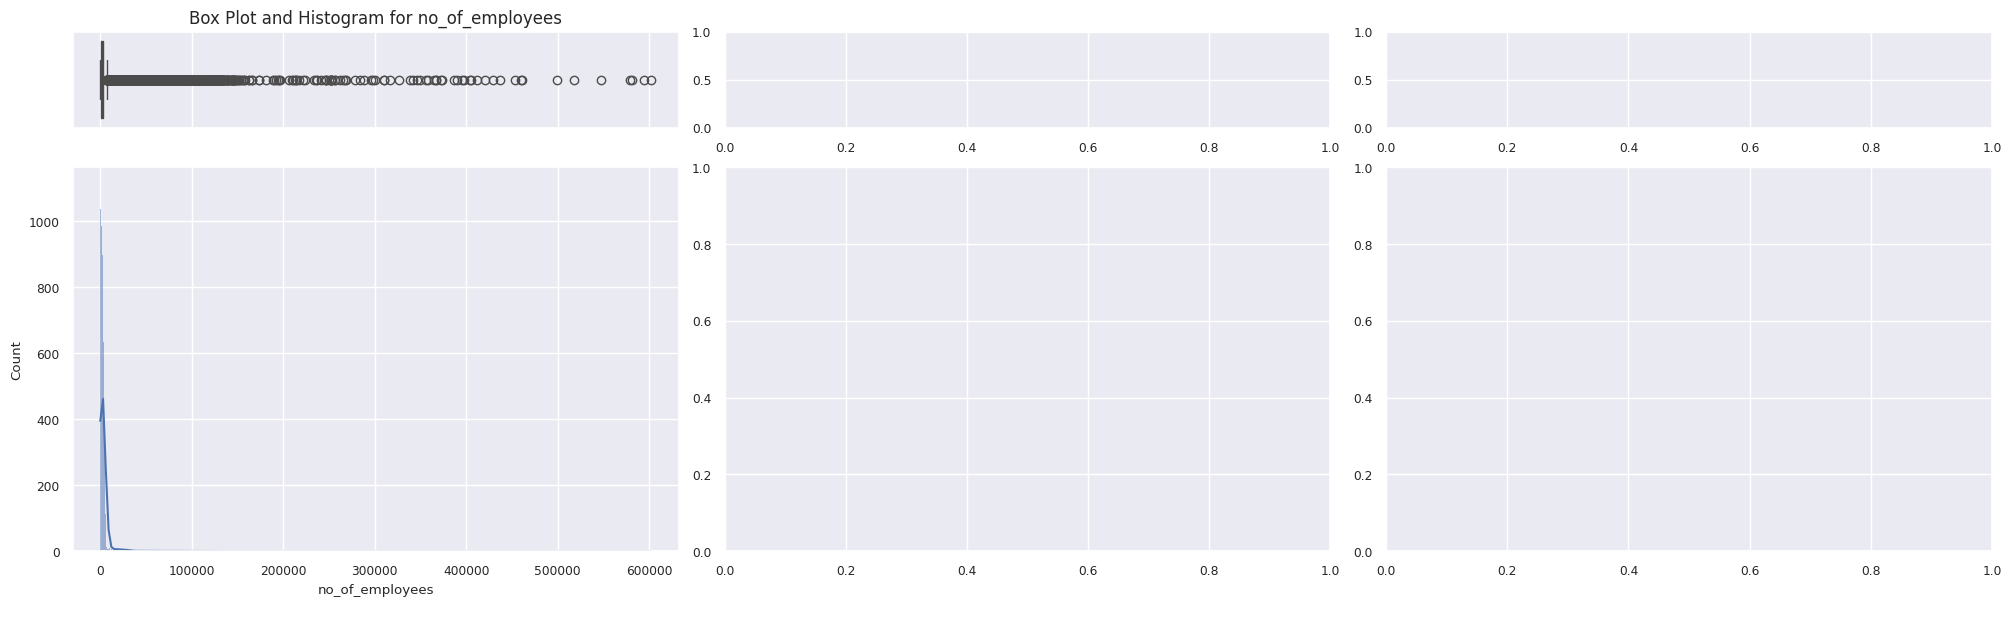

In [65]:
# Plot box and histplot for all numerical features for EDA purpose.
plot_numerical(evdata_eda_treated)

**Observations:**

**no_of_employees:**
* The number of employees in a company might influence visa approval, as larger companies could be perceived as more stable and capable of supporting foreign workers.
* Extreme outliers make the distribution skewed, with a few companies having a very large number of employees.
* Outliers in this feature might need to be treated for better model performance.

**yr_of_estab:**

* The year of establishment could be an indicator of a company's stability and reputation, potentially impacting visa approval chances.
* Older companies might have a higher likelihood of visa approval due to their established presence in the industry.
* The distribution is left skewed, indicating most companies were newly established.

**prevailing_wage:**

* The prevailing wage may be a crucial factor, as it ensures that foreign workers are not underpaid compared to their US counterparts. Higher wages might correlate with higher chances of visa approval.
* The distribution of prevailing wages is right skewed, however, 75% of the employees earn under 100,000 annually.


#### Univariate Analysis - Categorical Features

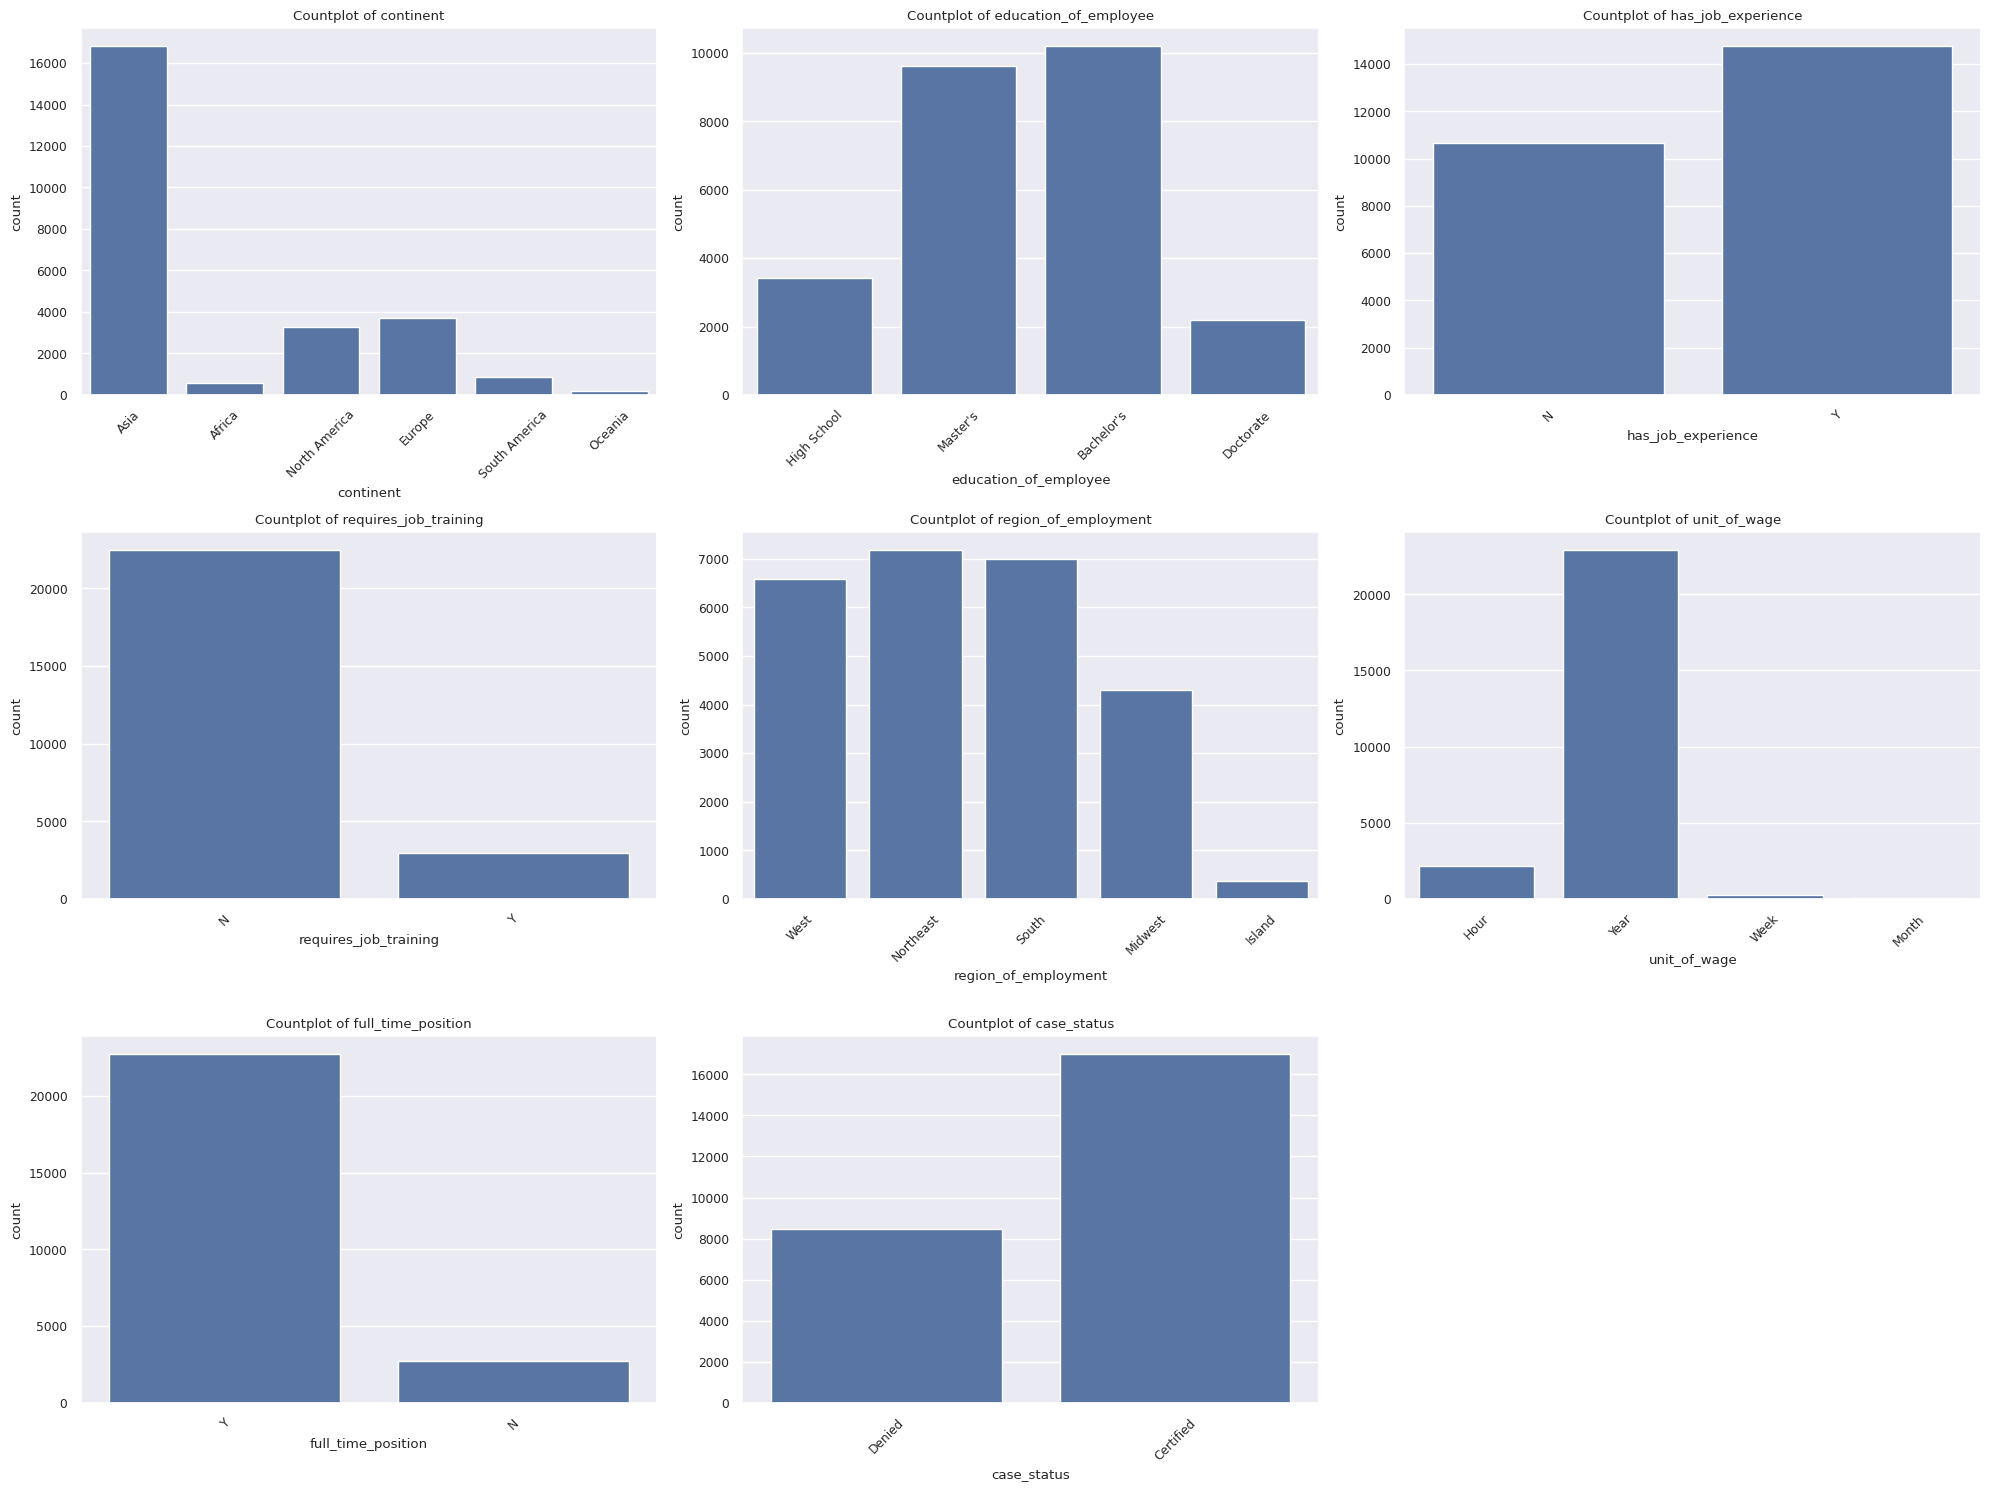

In [66]:
# Plot CountPlots for Categorical Values for EDA
plot_categorical(evdata_eda_treated)

**Observations:**

**continent:**

* Out of 6 continents, majority of applicants are from Asia (66%), followed by Europe (15%) and North America (13%).
* The continent of the employee might impact visa approval rates, as certain regions may have stronger economic ties with the US or specific skill sets that are in demand.
* Applicants from continents with higher approval rates might be targeted for recruitment by US companies. Bivariate analysis should help us identify the preference.

**education_of_employee:**

* Most applicants have either Bachelor's (40%) or Master's (38%) degrees.
* Higher education levels, such as Master's or Doctorate, are likely to have a positive impact on visa approval rates, reflecting the demand for highly skilled workers.

**has_job_experience:**

* There is a slight imbalance between applicants with and without job experience. As per the data about 58% of all applicants have job experience.
* Applicants with job experience might have higher approval rates, as experience is often valued in the job market.

**requires_job_training:**

* Most of the employees, over 88%, do not require job training.
* The requirement for job training might be less favorable for visa approval, as it could indicate that the applicant is not immediately ready for the position.

**region_of_employment:**

* Most applications are from the employers of Northeast, South and West region, combined 81.5%. A small portion of applicants are from Midwest and Islands.  
* Certain regions in the US might have higher approval rates due to regional labor shortages or industry-specific demands.

**unit_of_wage:**

* More than 90% of applicant are on contract with Yearly wages, small portion is on Hourly wages, with less than 2% on Weekly or Monthly wage contract.
* The unit of wage (e.g., hourly, yearly) could impact the perceived value of the compensation package, influencing visa approval.
* Yearly wages might be associated with more stable, long-term positions, potentially leading to higher approval rates.

**full_time_position:**

* Almost 90% of applicants are with Full-time positions.
* Full-time positions might be more likely to receive visa approval compared to part-time positions, as they offer more job security.

**case_status (target variable):**

* Almost 33% of visa applications are Denied, indicating a substantial volume of applications are being rejected.
* Identifying patterns or trends in visa approvals and denials could help in developing strategies to improve approval rates.

#### Bivariate Analysis - Relation with case_status (Target Variable)

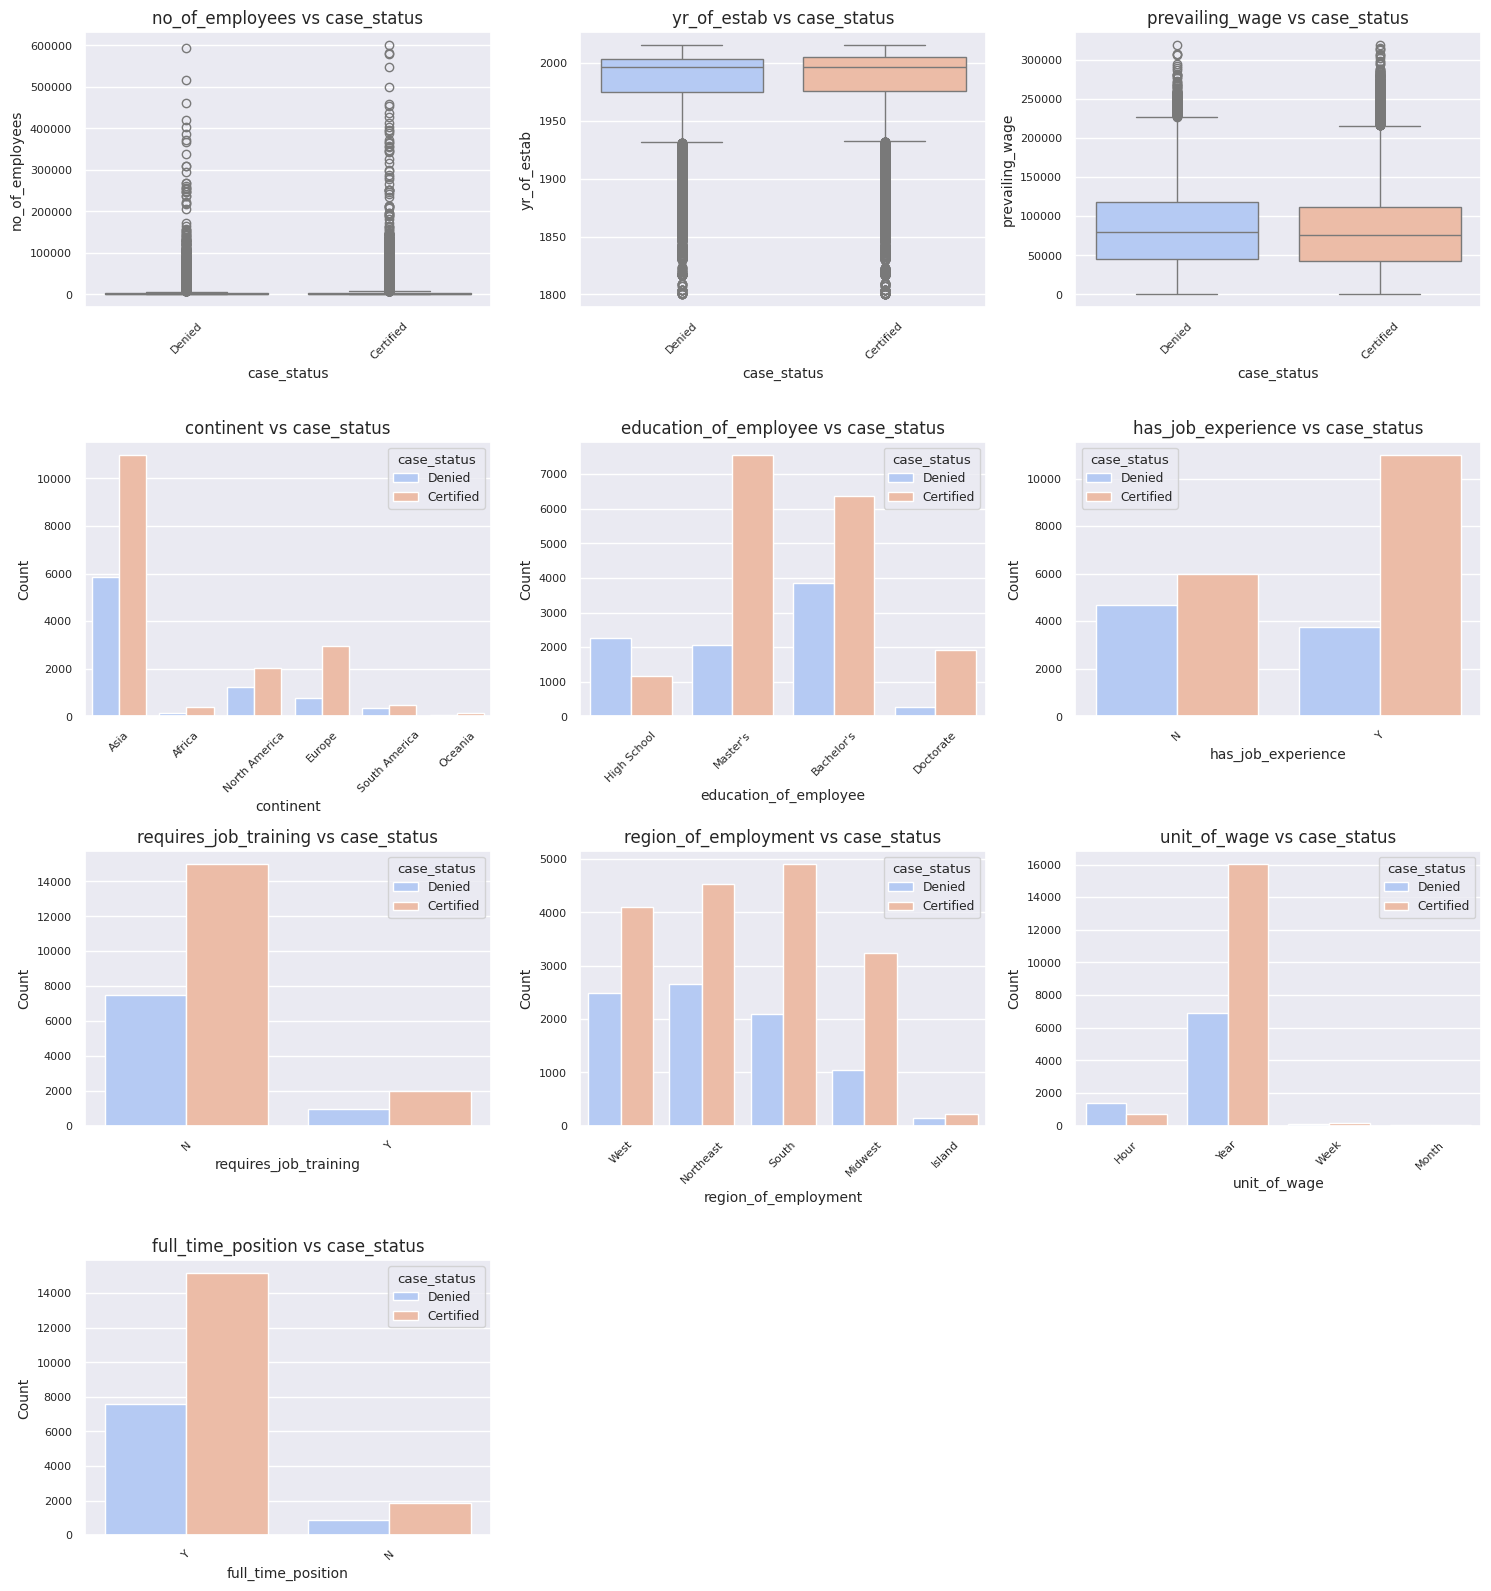

In [67]:
# Plot correlation charts to compare significant features with target variable
plot_bivariate_analysis_tv(evdata_eda_treated, 'case_status')

**Observations:**

**No_of_employees vs case_status:**

* No significant correlation observed between the number of employees and visa application outcomes.
* This suggests that the size of the employer's company does not impact the visa decision.

**Yr_of_estab vs case_status:**

* Company age does not appear to influence visa approval rates.
* Median establishment year for both approved and denied applications is around 1995.

**Prevailing_wage vs case_status:**

* No clear evidence that prevailing wage directly impacts visa approvals.
* Interestingly, slightly lower wages might be associated with higher approval rates.

**Continent vs case_status:**

* Europe has the highest approval rate at 79% (2,953 out of 3,727), while South America has the lowest at 58% (492 out of 851).
* Approval rates for other continents vary between 62% and 72%. Asia, despite being the majority, has a lower approval rate of 65%.

**Education_of_employee vs case_status:**

* Higher education levels correlate with increased visa approval rates.
* Rejection rates are inversely proportional to education level, with Doctorate holders facing the lowest rejection rate at 13%.

**Has_job_experience vs case_status:**

* Job experience significantly improves approval chances, with a 74% approval rate for experienced applicants compared to 56% for inexperienced ones.

**Requires_job_training vs case_status:**

* Job training requirement does not significantly impact visa outcomes, with 88% of applications not requiring training.

**Region_of_employment vs case_status:**

* The Midwest region shows the highest approval rate at 75%, followed by the South at 70%.
* Northeast and West regions have similar approval rates of about 62%, with the Islands region having the lowest at 60%.

**Unit_of_wage vs case_status:**

* Annual pay units are favored, with a 70% approval rate. Hourly wages have the lowest approval rate at 35%.
* The wage unit might be an important factor in predicting visa outcomes, with 90% of applicants being paid yearly.

**Full_time_position vs case_status:**

* The majority of applications are for full-time positions (89%), but there is no significant difference in approval rates between full-time and part-time jobs (66% to 68%).